In [1]:
import pandas as pd
import os
import win32com.client as client
from pandas import Series, DataFrame
import openpyxl as op
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import re
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, LeaveOneOut, LeavePOut
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
# Converte ficheiros XLS para ficheiros XLSX

excel = client.Dispatch("excel.application")
for file in os.listdir(os.getcwd() + "/XLS Version/"):
    filename, fileextension = os.path.splitext(file)
    wb = excel.Workbooks.Open(os.getcwd() + "/XLS Version/" + file)
    output_directory = os.getcwd() + "/XLSX Version/" + filename
    wb.SaveAs(output_directory, 51)
    wb.Close()

In [8]:
# A pasta com o nome ResultFolder vai ter de ser criada no mesmo sitio onde está o projeto e têm que ser feito antes disto
# Criar o ficheiro PassageirosExcel para ter toda a informação dos passageiros de 2010 a 2019

filename2010Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2010.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2011Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2011.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2012Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2012.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2013Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2013.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2014Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2014.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2015Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2015.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2016Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2016.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2017Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2017.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2018Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2018.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')
filename2019Passageiros = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2019.xlsx', sheet_name = '30 Dias_Passag', skiprows = 2, na_values = 'n/a')

mergePassageiros = pd.concat([filename2010Passageiros, filename2011Passageiros, filename2012Passageiros, filename2013Passageiros, filename2014Passageiros, filename2015Passageiros, filename2016Passageiros, filename2017Passageiros, filename2018Passageiros, filename2019Passageiros])

mergePassageiros.to_excel('ResultFolder/PassageirosExcel.xlsx', index = False)

# Criar o ficheiro AcidentesExcel para ter toda a informação dos acidentes de 2010 a 2019

filename2010Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2010.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2011Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2011.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2012Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2012.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2013Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2013.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2014Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2014.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2015Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2015.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2016Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2016.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2017Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2017.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2018Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2018.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')
filename2019Acidentes = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2019.xlsx', sheet_name = '30 Dias _ Acidentes', skiprows = 2, na_values = 'n/a')

mergeAcidentes = pd.concat([filename2010Acidentes, filename2011Acidentes, filename2012Acidentes, filename2013Acidentes, filename2014Acidentes, filename2015Acidentes, filename2016Acidentes, filename2017Acidentes, filename2018Acidentes, filename2019Acidentes])

mergeAcidentes.to_excel('ResultFolder/AcidentesExcel.xlsx', index = False)

# Criar o ficheiro PeõesExcel para ter toda a informação dos peões de 2010 a 2019

filename2010Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2010.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2011Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2011.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2012Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2012.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2013Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2013.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2014Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2014.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2015Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2015.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2016Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2016.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2017Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2017.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2018Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2018.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')
filename2019Peões = pd.read_excel('C:/Users/pedro/Jupyter/IAA_2022&2023/XLSX Version/ISCTE_2019.xlsx', sheet_name = '30 Dias_Peões', skiprows = 2, na_values = 'n/a')

mergePeões = pd.concat([filename2010Peões, filename2011Peões, filename2012Peões, filename2013Peões, filename2014Peões, filename2015Peões, filename2016Peões, filename2017Peões, filename2018Peões, filename2019Peões])

mergePeões.to_excel('ResultFolder/PeõesExcel.xlsx', index = False)

In [9]:
# 1) Extrair uma amostra aleátorio dos três ficheiros feitos anteriormente

# Passageiros

dfPassageiros = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcel.xlsx")
dfPassageiros.head()

Id. Acidente             Datahora      Entidades Fiscalizadoras  \
0    2010422712  2010:01:10 07:30:00  Polícia de Segurança Pública   
1    2010423616  2010:01:02 15:45:00  Polícia de Segurança Pública   
2    2010420752  2010:01:02 13:30:00  Polícia de Segurança Pública   
3    2010427436  2010:01:16 06:15:00  Polícia de Segurança Pública   
4    2010443087  2010:01:31 01:15:00   Guarda Nacional Republicana   

   Id. Passageiro Lesões a 30 dias       Sexo Posição Veiculo  \
0               1      Ferido leve  Masculino        À frente   
1               1      Ferido leve   Feminino   À rectaguarda   
2               1      Ferido leve   Feminino   À rectaguarda   
3               1      Ferido leve   Feminino    Desconhecido   
4               1      Ferido leve  Masculino        À frente   

          Acessórios Passageiro Distrito    Concelho  ...  \
0  C/ capacete/ cinto segurança    Porto  Matosinhos  ...   
1  C/ capacete/ cinto segurança   Lisboa    Odivelas  ...   
2  C/ capacete/ cinto segurança    Porto       Porto  ...   
3  C/ capacete/ cinto segurança   Lisboa      Lisboa  ...   
4  C/ capacete/ cinto segurança   Lisboa       Mafra  ...   

   Passageiro Gr.Etario(35-39) SUM  Passageiro Gr.Etario(40-44) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(45-49) SUM  Passageiro Gr.Etario(50-54) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(55-59) SUM  Passageiro Gr.Etario(60-64) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(65-69) SUM  Passageiro Gr.Etario(70-74) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(>=75) SUM  Passageiro Gr.Etario(Não Def.) SUM  
0                               0                                   0  
1                               0                                   0  
2                               1                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 28 columns]

In [10]:
dfPassageiros.shape

(105683, 28)

In [11]:
SampleDataPassageiros = dfPassageiros.sample(frac = 0.1)
SampleDataPassageiros

Id. Acidente             Datahora      Entidades Fiscalizadoras  \
68056   20161015594  2016:01:07 14:00:00  Polícia de Segurança Pública   
59153    2015998328  2015:08:05 19:10:00   Guarda Nacional Republicana   
40857    2013696018  2013:03:27 14:30:00   Guarda Nacional Republicana   
85583   20181365028  2018:01:04 19:00:00   Guarda Nacional Republicana   
63724    2015950259  2015:06:05 01:45:00  Polícia de Segurança Pública   
...             ...                  ...                           ...   
49414    2014839486  2014:05:11 17:40:00   Guarda Nacional Republicana   
9869     2010451230  2010:03:27 23:00:00   Guarda Nacional Republicana   
19103    2011563027  2011:08:06 11:30:00   Guarda Nacional Republicana   
12520    2010477222  2010:07:03 02:15:00   Guarda Nacional Republicana   
38566    2013710976  2013:08:02 20:00:00  Polícia de Segurança Pública   

       Id. Passageiro Lesões a 30 dias       Sexo Posição Veiculo  \
68056               1      Ferido leve   Feminino        À frente   
59153               2      Ferido leve   Feminino        À frente   
40857               3      Ferido leve   Feminino    Desconhecido   
85583               1      Ferido leve  Masculino        À frente   
63724               1      Ferido leve  Masculino   À rectaguarda   
...               ...              ...        ...             ...   
49414               1      Ferido leve   Feminino        À frente   
9869                4      Ferido leve  Masculino   À rectaguarda   
19103               1      Ferido leve   Feminino        À frente   
12520               1      Ferido leve  Masculino    Desconhecido   
38566               1      Ferido leve  Masculino        À frente   

              Acessórios Passageiro Distrito             Concelho  ...  \
68056  C/ capacete/ cinto segurança    Porto                Porto  ...   
59153  C/ capacete/ cinto segurança  Coimbra     Montemor-o-Velho  ...   
40857  C/ capacete/ cinto segurança    Braga                 Fafe  ...   
85583  C/ capacete/ cinto segurança    Porto           Felgueiras  ...   
63724  C/ capacete/ cinto segurança  Coimbra              Coimbra  ...   
...                             ...      ...                  ...  ...   
49414  C/ capacete/ cinto segurança     Faro                 Faro  ...   
9869   C/ capacete/ cinto segurança    Braga            Esposende  ...   
19103  C/ capacete/ cinto segurança   Leiria               Ansiao  ...   
12520  C/ capacete/ cinto segurança   Lisboa               Sintra  ...   
38566  C/ capacete/ cinto segurança   Lisboa  Vila Franca de Xira  ...   

       Passageiro Gr.Etario(35-39) SUM  Passageiro Gr.Etario(40-44) SUM  \
68056                                0                                0   
59153                                0                                0   
40857                                1                                0   
85583                                0                                0   
63724                                0                                0   
...                                ...                              ...   
49414                                0                                0   
9869                                 0                                0   
19103                                0                                0   
12520                                0                                0   
38566                                1                                0   

       Passageiro Gr.Etario(45-49) SUM  Passageiro Gr.Etario(50-54) SUM  \
68056                                0                                0   
59153                                1                                0   
40857                                0                                0   
85583                                0                                0   
63724                                0                                0   
...                                ...           

In [12]:
SampleDataPassageiros.to_excel('ResultFolder/PassageirosExcelRandomSample.xlsx', index = False)

In [13]:
# Acidentes

dfAcidentes = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcel.xlsx")
dfAcidentes.head()

Id. Acidente             Datahora       Dia       Mês      Hora  \
0    2010442610  2010:01:01 00:05:00  00:00:00  00:00:00  00:05:00   
1    2010442441  2010:01:01 00:30:00  00:00:00  00:00:00  00:30:00   
2    2010422349  2010:01:01 00:35:00  00:00:00  00:00:00  00:35:00   
3    2010439194  2010:01:01 00:40:00  00:00:00  00:00:00  00:40:00   
4    2010442390  2010:01:01 00:40:00  00:00:00  00:00:00  00:40:00   

       Entidades Fiscalizadoras  Velocidade local  Velocidade geral  \
0   Guarda Nacional Republicana              50.0              50.0   
1   Guarda Nacional Republicana             120.0             120.0   
2  Polícia de Segurança Pública              50.0              50.0   
3   Guarda Nacional Republicana              70.0              90.0   
4   Guarda Nacional Republicana              50.0              50.0   

   Dia da Semana Latitude GPS  ...    Obstáculos  \
0  Sexta-Feira       38,93275  ...  Inexistentes   
1  Sexta-Feira      41,185697  ...  Inexistentes   
2  Sexta-Feira           0,00  ...  Inexistentes   
3  Sexta-Feira      40,701323  ...  Inexistentes   
4  Sexta-Feira            NaN  ...  Inexistentes   

                                Sentidos        Sinais  \
0                           NÃO DEFINIDO  NÃO DEFINIDO   
1  No sentido crescente da quilometragem        Outros   
2                           NÃO DEFINIDO  NÃO DEFINIDO   
3                           NÃO DEFINIDO        Outros   
4                           NÃO DEFINIDO  NÃO DEFINIDO   

          Sinais Luminosos   Tipo Piso Traçado 1       Traçado 2  \
0             Inexistentes  Betuminoso     Recta  Com inclinação   
1             Inexistentes  Betuminoso     Curva  Com inclinação   
2             Inexistentes  Betuminoso     Curva      Em patamar   
3  A funcionar normalmente  Betuminoso     Recta  Com inclinação   
4             Inexistentes  Betuminoso     Recta  Com inclinação   

                   Traçado 3     Traçado 4 Via Trânsito  
0  Sem berma ou impraticável    No passeio      Direita  
1      Berma não pavimentada  Em plena via      Direita  
2          Berma pavimentada    No passeio      Direita  
3          Berma pavimentada  Em plena via      Direita  
4          Berma pavimentada      Na berma      Direita  

[5 rows x 43 columns]

In [14]:
dfAcidentes.shape

(163810, 43)

In [15]:
SampleDataAcidentes = dfAcidentes.sample(frac = 0.07)
SampleDataAcidentes

Id. Acidente             Datahora                  Dia  \
45977     2012623775  2012:06:20 13:40:00  1900-01-20 00:00:00   
142936   20181418537  2018:05:20 15:07:00  1900-01-20 00:00:00   
2434      2010441943  2010:01:28 04:30:00  1900-01-28 00:00:00   
14820     2010470189  2010:06:12 20:30:00  1900-01-12 00:00:00   
158207   20191736527  2019:05:01 16:52:00             00:00:00   
...              ...                  ...                  ...   
156533   20191691988  2019:04:11 19:10:00  1900-01-11 00:00:00   
126922   20171268179  2017:05:26 17:50:00  1900-01-26 00:00:00   
94972     2015945086  2015:06:10 23:50:00  1900-01-10 00:00:00   
17652     2011517202  2011:01:15 21:50:00  1900-01-15 00:00:00   
83961     2015891005  2015:01:28 07:30:00  1900-01-28 00:00:00   

                        Mês      Hora      Entidades Fiscalizadoras  \
45977   1900-06-01 00:00:00  13:40:00   Guarda Nacional Republicana   
142936  1900-05-01 00:00:00  15:07:00   Guarda Nacional Republicana   
2434               00:00:00  04:30:00   Guarda Nacional Republicana   
14820   1900-06-01 00:00:00  20:30:00   Guarda Nacional Republicana   
158207  1900-05-01 00:00:00  16:52:00   Guarda Nacional Republicana   
...                     ...       ...                           ...   
156533  1900-04-01 00:00:00  19:10:00   Guarda Nacional Republicana   
126922  1900-05-01 00:00:00  17:50:00   Guarda Nacional Republicana   
94972   1900-06-01 00:00:00  23:50:00  Polícia de Segurança Pública   
17652              00:00:00  21:50:00   Guarda Nacional Republicana   
83961              00:00:00  07:30:00  Polícia de Segurança Pública   

        Velocidade local  Velocidade geral  Dia da Semana Latitude GPS  ...  \
45977               50.0              50.0  Quarta-Feira           NaN  ...   
142936              90.0              90.0  Domingo          41,083558  ...   
2434               100.0             100.0  Quinta-Feira     41,582826  ...   
14820               50.0              50.0  Sábado           41,036695  ...   
158207              50.0              50.0  Quarta-Feira     39,616940  ...   
...                  ...               ...            ...          ...  ...   
156533              50.0              50.0  Quinta-Feira     41,366410  ...   
126922              50.0              50.0  Sexta-Feira      38,773450  ...   
94972               50.0              50.0  Quarta-Feira     41,108406  ...   
17652               50.0              50.0  Sábado                 NaN  ...   
83961               50.0              50.0  Quarta-Feira     41,146508  ...   

          Obstáculos      Sentidos        Sinais         Sinais Luminosos  \
45977   Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
142936  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
2434    Inexistentes  NÃO DEFINIDO        Outros             Inexistentes   
14820   Inexistentes  NÃO DEFINIDO        Outros             Inexistentes   
158207  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
...              ...           ...           ...                      ...   
156533  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
126922  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
94972   Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO             Inexistentes   
17652   Inexistentes  NÃO DEFINIDO          Stop             Inexistentes   
83961   Inexistentes  NÃO DEFINIDO        Outros  A funcionar normalmente   

         Tipo Piso Traçado 1       Traçado 2                  Traçado 3  \
45977   Betuminoso     Recta      Em patamar  Sem berma ou impraticável   
142936  Betuminoso     Curva      Em patamar  Sem berma ou impraticável   
2434    Betuminoso     Recta      Em patamar          Berma pavimentada   
14820   Betuminoso     Curva      Em patamar      Berma não pavimentada   
158207  Betuminoso     Curva      Em patamar      Berma não pavimentada   
...            ...       ...          

In [16]:
SampleDataAcidentes.to_excel('ResultFolder/AcidentesExcelRandomSample.xlsx', index = False)

In [17]:
# Peões

dfPeões = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcel.xlsx")
dfPeões.head()

Id. Acidente              Freguesia  Tipo Natureza  \
0    2010434576                Agualva  Atropelamento   
1    2010427521                Carnide  Atropelamento   
2    2010437250              Cortegaça  Atropelamento   
3    2010429690              Ermesinde  Atropelamento   
4    2010430607  São Mamede de Infesta       Despiste   

                                            Natureza             Datahora  \
0                             Atropelamento de peões  2010:02:13 15:10:00   
1                             Atropelamento de peões  2010:01:18 18:00:00   
2                             Atropelamento de peões  2010:01:15 18:30:00   
3                             Atropelamento de peões  2010:01:26 17:25:00   
4  Despiste com colisão com veículo imobil. ou ob...  2010:01:31 15:10:00   

       Entidades Fiscalizadoras  Id. Peao       Sexo  \
0  Polícia de Segurança Pública         1  Masculino   
1  Polícia de Segurança Pública         1   Feminino   
2   Guarda Nacional Republicana         1  Masculino   
3  Polícia de Segurança Pública         1   Feminino   
4  Polícia de Segurança Pública         2   Feminino   

                                         Acções Peão Distrito  ...  \
0                Atravessando em passagem sinalizada   Lisboa  ...   
1                Atravessando em passagem sinalizada   Lisboa  ...   
2  Atravessando fora da passagem de peões a mais ...   Aveiro  ...   
3                Atravessando em passagem sinalizada    Porto  ...   
4                  Transitando pela berma ou passeio    Porto  ...   

  Peao Gr.Etario(35-39) SUM Peao Gr.Etario(40-44) SUM  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Peao Gr.Etario(45-49) SUM  Peao Gr.Etario (50-54) SUM  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Peao Gr.Etario (55-59) SUM  Peao Gr.Etario (60-64) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Peao Gr.Etario (65-69) SUM  Peao Gr.Etario (70-74) SUM  \
0                           0                           0   
1                           0                           0   
2                           1                           0   
3                           0                           0   
4                           1                           0   

   Peao Gr.Etario (>=75) SUM  Peao Gr.Etario(Não Def.) SUM  
0                          0                             0  
1                          0                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 30 columns]

In [18]:
dfPeões.shape

(55928, 30)

In [19]:
SampleDataPeões = dfPeões.sample(frac = 0.2)
SampleDataPeões

Id. Acidente                                          Freguesia  \
34775   20161123561  União das freguesias de Oeiras e São Julião da...   
11187    2011522323                                            Paderne   
11194    2011508472                                               Ovar   
2355     2010459308                                      Olhos de Água   
29941    2015961213                                  Santa Maria Maior   
...             ...                                                ...   
15645    2012645426                                    Armação de Pêra   
40447   20171343082                                             Nazaré   
38781   20161077542  União das freguesias de Santa Iria de Azoia, S...   
32318   20161030490                              Ílhavo (São Salvador)   
47193   20181580783          União das freguesias da Sé e São Lourenço   

       Tipo Natureza                Natureza             Datahora  \
34775  Atropelamento  Atropelamento de peões  2016:11:17 13:30:00   
11187  Atropelamento  Atropelamento de peões  2011:02:22 17:06:00   
11194  Atropelamento  Atropelamento de peões  2011:01:22 08:10:00   
2355   Atropelamento  Atropelamento de peões  2010:04:22 14:20:00   
29941  Atropelamento  Atropelamento de peões  2015:07:24 15:05:00   
...              ...                     ...                  ...   
15645  Atropelamento  Atropelamento de peões  2012:09:27 19:40:00   
40447  Atropelamento  Atropelamento de peões  2017:12:15 09:15:00   
38781  Atropelamento  Atropelamento de peões  2016:06:15 11:00:00   
32318  Atropelamento  Atropelamento de peões  2015:11:06 18:55:00   
47193  Atropelamento  Atropelamento de peões  2018:05:05 09:45:00   

           Entidades Fiscalizadoras  Id. Peao       Sexo  \
34775  Polícia de Segurança Pública         1   Feminino   
11187   Guarda Nacional Republicana         1   Feminino   
11194  Polícia de Segurança Pública         1  Masculino   
2355    Guarda Nacional Republicana         1  Masculino   
29941  Polícia de Segurança Pública         1   Feminino   
...                             ...       ...        ...   
15645   Guarda Nacional Republicana         1   Feminino   
40447  Polícia de Segurança Pública         1  Masculino   
38781  Polícia de Segurança Pública         1  Masculino   
32318   Guarda Nacional Republicana         1  Masculino   
47193  Polícia de Segurança Pública         1  Masculino   

                                             Acções Peão          Distrito  \
34775                Atravessando em passagem sinalizada            Lisboa   
11187  Surgindo inesperadamente na faixa de rodagem d...  Viana do Castelo   
11194  Atravessando fora da passagem de peões, a meno...            Aveiro   
2355                           Em plena faixa de rodagem              Faro   
29941                Atravessando em passagem sinalizada            Lisboa   
...                                                  ...               ...   
15645       Transitando pela direita da faixa de rodagem              Faro   
40447  Atravessando fora da passagem de peões a mais ...            Leiria   
38781                Atravessando em passagem sinalizada            Lisboa   
32318                Atravessando em passagem sinalizada            Aveiro   
47193  Atravessando fora da passagem de peões, a meno...        Portalegre   

       ... Peao Gr.Etario(35-39) SUM Peao Gr.Etario(40-44) SUM  \
34775  ...                         0                         0   
11187  ...                         0                         0   
11194  ...                         0                         0   
2355   ...                         1                         0   
29941  ...                         0                         0   
...    ...                       ...                       ...   
15645  ...                         0                         0   
40447  ...                         0                         0   
38781  ...                         0 

In [20]:
SampleDataPeões.to_excel('ResultFolder/PeõesExcelRandomSample.xlsx', index = False)

In [21]:
# 2) As caracteristicas dos ficheiros que devem ser normalizadas, discretizadas e mudadas de formato

# Normalizadas: Ficheiro Acidentes: Coluna G (Velocidade local) e Coluna H (Velocidade geral)
# Min-Max

dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample.xlsx")
dfAcidentesSample["Velocidade local"] = (dfAcidentesSample["Velocidade local"] - dfAcidentesSample["Velocidade local"].min()) / (dfAcidentesSample["Velocidade local"].max() - dfAcidentesSample["Velocidade local"].min())
dfAcidentesSample["Velocidade geral"] = (dfAcidentesSample["Velocidade geral"] - dfAcidentesSample["Velocidade geral"].min()) / (dfAcidentesSample["Velocidade geral"].max() - dfAcidentesSample["Velocidade geral"].min())
# LatitudeGPS = str(dfAcidentesSample["Latitude GPS"])
# LongitudeGPS = str(dfAcidentesSample["Longitude GPS"])
# dfAcidentesSample["Latitude GPS"] = (dfAcidentesSample["Latitude GPS"] - str(dfAcidentesSample["Latitude GPS"].mean())) / (str(dfAcidentesSample["Latitude GPS"].std()))
# dfAcidentesSample["Longitude GPS"] = (dfAcidentesSample["Longitude GPS"] - str(dfAcidentesSample["Longitude GPS"].mean())) / (str(dfAcidentesSample["Longitude GPS"].std()))
# stats.zscore(dfAcidentesSample["Latitude GPS"])
# dfAcidentesSample["Latitude GPS"] = dfAcidentesSample["Latitude GPS"].apply(stats.zscore)
# dfAcidentesSample["Longitude GPS"] = dfAcidentesSample["Longitude GPS"].apply(stats.zscore)
# stats.zscore(dfAcidentesSample["Longitude GPS"])
# dfAcidentesSample["Latitude GPS"] = (dfAcidentesSample["Latitude GPS"] - dfAcidentesSample["Latitude GPS"].min()) / (dfAcidentesSample["Latitude GPS"].max() - dfAcidentesSample["Latitude GPS"].min())
# dfAcidentesSample["Longitude GPS"] = (dfAcidentesSample["Longitude GPS"] - dfAcidentesSample["Longitude GPS"].min()) / (dfAcidentesSample["Longitude GPS"].max() - dfAcidentesSample["Longitude GPS"].min())
    
dfAcidentesSample.to_excel('ResultFolder/AcidentesExcelRandomSample_Norm.xlsx', index = False)    
    
# Discretizadas:
# Formato:

In [2]:
# 3) Quais as caracteristicas dos ficheiros que são sazonais

dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")
datasetVL = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Velocidade local'])
datasetVG = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Velocidade geral'])
datasetLatitude = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Latitude GPS'])
datasetLongitude = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Longitude GPS'])
# df = pd.DataFrame(dfAcidentesSample)
# columnsVelocidadeLocal = [1,6]
# columnsVelocidadeGeral = [1,7]
# dfVelocidadeLocal = df[df.columns[columnsVelocidadeLocal]]
# dfVelocidadeGeral = df[df.columns[columnsVelocidadeGeral]]
# print(dfVelocidadeLocal)
# print(dfVelocidadeGeral)
datasetVL

Datahora  Velocidade local
0      2012:06:20 13:40:00          0.363636
1      2018:05:20 15:07:00          0.727273
2      2010:01:28 04:30:00          0.818182
3      2010:06:12 20:30:00          0.363636
4      2019:05:01 16:52:00          0.363636
...                    ...               ...
11462  2019:04:11 19:10:00          0.363636
11463  2017:05:26 17:50:00          0.363636
11464  2015:06:10 23:50:00          0.363636
11465  2011:01:15 21:50:00          0.363636
11466  2015:01:28 07:30:00          0.363636

[11467 rows x 2 columns]

In [3]:
datasetVG

Datahora  Velocidade geral
0      2012:06:20 13:40:00               0.3
1      2018:05:20 15:07:00               0.7
2      2010:01:28 04:30:00               0.8
3      2010:06:12 20:30:00               0.3
4      2019:05:01 16:52:00               0.3
...                    ...               ...
11462  2019:04:11 19:10:00               0.3
11463  2017:05:26 17:50:00               0.3
11464  2015:06:10 23:50:00               0.3
11465  2011:01:15 21:50:00               0.3
11466  2015:01:28 07:30:00               0.3

[11467 rows x 2 columns]

In [4]:
datasetLatitude

Datahora Latitude GPS
0      2012:06:20 13:40:00          NaN
1      2018:05:20 15:07:00    41,083558
2      2010:01:28 04:30:00    41,582826
3      2010:06:12 20:30:00    41,036695
4      2019:05:01 16:52:00    39,616940
...                    ...          ...
11462  2019:04:11 19:10:00    41,366410
11463  2017:05:26 17:50:00    38,773450
11464  2015:06:10 23:50:00    41,108406
11465  2011:01:15 21:50:00          NaN
11466  2015:01:28 07:30:00    41,146508

[11467 rows x 2 columns]

In [5]:
datasetLongitude

Datahora Longitude GPS
0      2012:06:20 13:40:00           NaN
1      2018:05:20 15:07:00     -8,082992
2      2010:01:28 04:30:00     -8,435302
3      2010:06:12 20:30:00     -8,227539
4      2019:05:01 16:52:00     -8,679668
...                    ...           ...
11462  2019:04:11 19:10:00     -8,197197
11463  2017:05:26 17:50:00     -7,418334
11464  2015:06:10 23:50:00     -8,639760
11465  2011:01:15 21:50:00           NaN
11466  2015:01:28 07:30:00     -8,601923

[11467 rows x 2 columns]

In [6]:
# Remover todos os valores da Latitude GPS e Longitude GPS que contêm NaN
datasetLatitude = datasetLatitude.dropna()
datasetLatitude

Datahora Latitude GPS
1      2018:05:20 15:07:00    41,083558
2      2010:01:28 04:30:00    41,582826
3      2010:06:12 20:30:00    41,036695
4      2019:05:01 16:52:00    39,616940
5      2010:05:17 14:10:00         0,00
...                    ...          ...
11461  2011:05:20 13:30:00         0,00
11462  2019:04:11 19:10:00    41,366410
11463  2017:05:26 17:50:00    38,773450
11464  2015:06:10 23:50:00    41,108406
11466  2015:01:28 07:30:00    41,146508

[10182 rows x 2 columns]

In [7]:
datasetLongitude = datasetLongitude.dropna()
datasetLongitude

Datahora Longitude GPS
1      2018:05:20 15:07:00     -8,082992
2      2010:01:28 04:30:00     -8,435302
3      2010:06:12 20:30:00     -8,227539
4      2019:05:01 16:52:00     -8,679668
5      2010:05:17 14:10:00          0,00
...                    ...           ...
11461  2011:05:20 13:30:00          0,00
11462  2019:04:11 19:10:00     -8,197197
11463  2017:05:26 17:50:00     -7,418334
11464  2015:06:10 23:50:00     -8,639760
11466  2015:01:28 07:30:00     -8,601923

[10175 rows x 2 columns]

In [8]:
print(datasetVL.dtypes) 

Datahora             object
Velocidade local    float64
dtype: object


In [9]:
print(datasetVG.dtypes)

Datahora             object
Velocidade geral    float64
dtype: object


In [10]:
print(datasetLatitude.dtypes)

Datahora        object
Latitude GPS    object
dtype: object


In [11]:
print(datasetLongitude.dtypes)

Datahora         object
Longitude GPS    object
dtype: object


In [12]:
datasetVL['Datahora'] = pd.to_datetime(datasetVL['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetVL['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [13]:
datasetVG['Datahora'] = pd.to_datetime(datasetVG['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetVG['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [14]:
datasetLatitude['Datahora'] = pd.to_datetime(datasetLatitude['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetLatitude['Datahora'].head())

1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
5   2010-05-17 14:10:00
Name: Datahora, dtype: datetime64[ns]


<ipython-input-14-b85d02b53238>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetLatitude['Datahora'] = pd.to_datetime(datasetLatitude['Datahora'], format = '%Y:%m:%d %H:%M:%S')


In [15]:
datasetLongitude['Datahora'] = pd.to_datetime(datasetLongitude['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetLongitude['Datahora'].head())

1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
5   2010-05-17 14:10:00
Name: Datahora, dtype: datetime64[ns]


<ipython-input-15-d1be636f70dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetLongitude['Datahora'] = pd.to_datetime(datasetLongitude['Datahora'], format = '%Y:%m:%d %H:%M:%S')


In [222]:
datasetVL = datasetVL.set_index('Datahora')
print(datasetVL.head())

                     Velocidade local
Datahora                             
2012-06-20 13:40:00          0.363636
2018-05-20 15:07:00          0.727273
2010-01-28 04:30:00          0.818182
2010-06-12 20:30:00          0.363636
2019-05-01 16:52:00          0.363636


In [223]:
datasetVG = datasetVG.set_index('Datahora')
print(datasetVG.head())

                     Velocidade geral
Datahora                             
2012-06-20 13:40:00               0.3
2018-05-20 15:07:00               0.7
2010-01-28 04:30:00               0.8
2010-06-12 20:30:00               0.3
2019-05-01 16:52:00               0.3


In [224]:
datasetLatitude = datasetLatitude.set_index('Datahora')
print(datasetLatitude.head())

                    Latitude GPS
Datahora                        
2018-05-20 15:07:00    41,083558
2010-01-28 04:30:00    41,582826
2010-06-12 20:30:00    41,036695
2019-05-01 16:52:00    39,616940
2010-05-17 14:10:00         0,00


In [225]:
datasetLongitude = datasetLongitude.set_index('Datahora')
print(datasetLongitude.head())

                    Longitude GPS
Datahora                         
2018-05-20 15:07:00     -8,082992
2010-01-28 04:30:00     -8,435302
2010-06-12 20:30:00     -8,227539
2019-05-01 16:52:00     -8,679668
2010-05-17 14:10:00          0,00


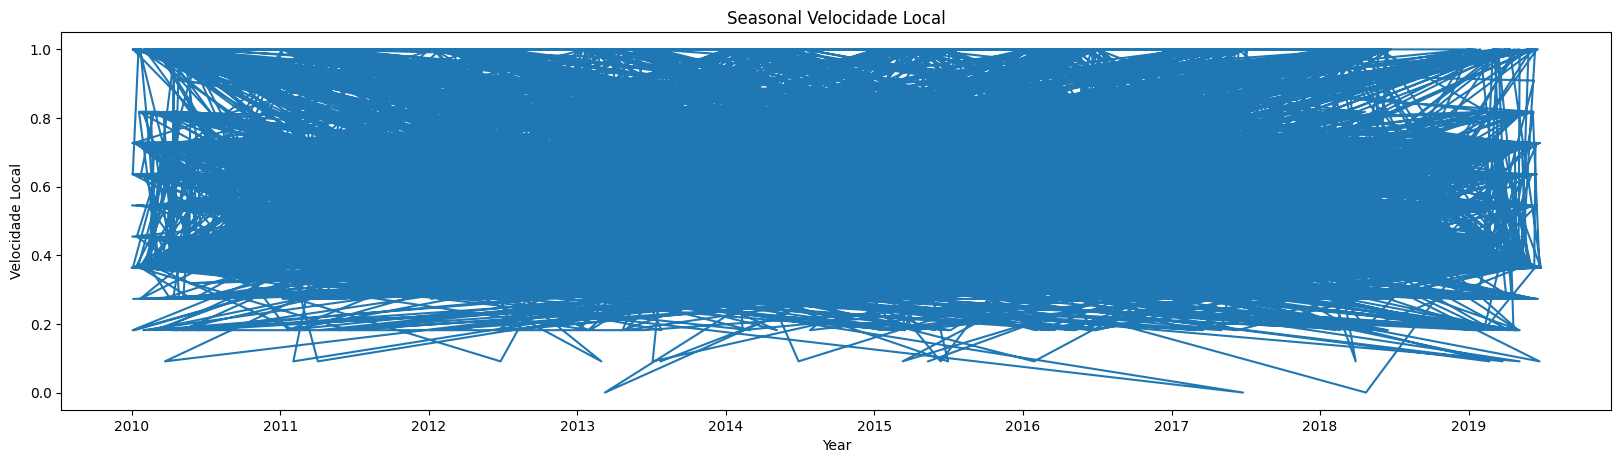

In [16]:
def plot_graph_VelocidadeLocal(df, x, y, title = "", xlabel = 'Year', ylabel = 'Velocidade Local', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_VelocidadeLocal(datasetVL, x = datasetVL.index, y = datasetVL['Velocidade local'], title = 'Seasonal Velocidade Local')

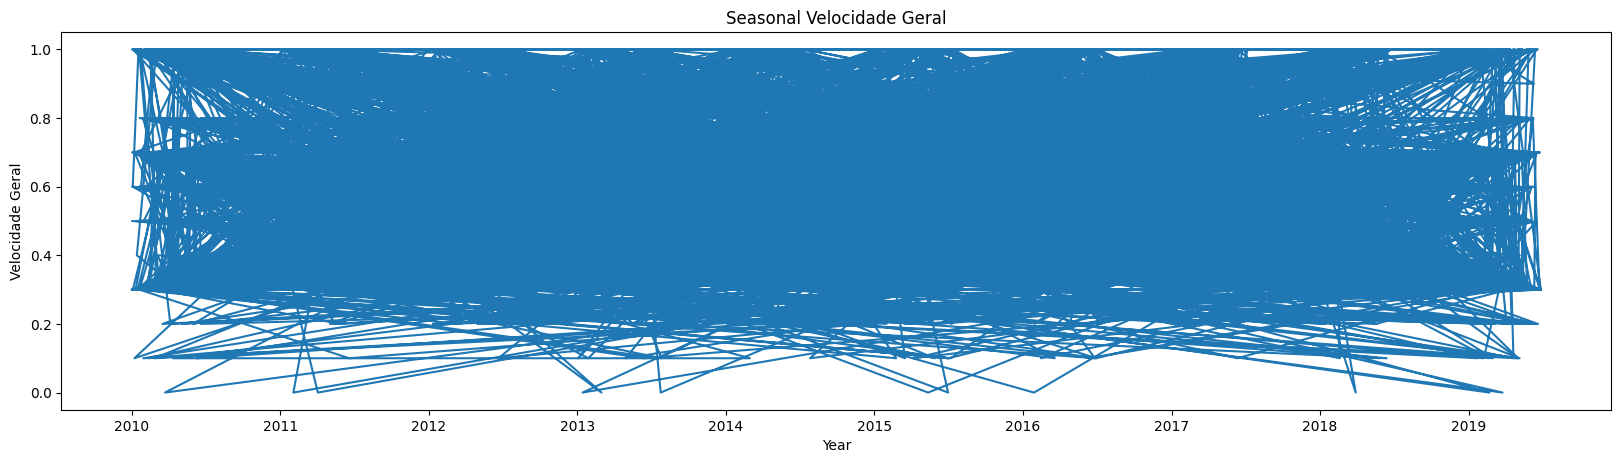

In [18]:
def plot_graph_VelocidadeGeral(df, x, y, title = "", xlabel = 'Year', ylabel = 'Velocidade Geral', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_VelocidadeGeral(datasetVG, x = datasetVG.index, y = datasetVG['Velocidade geral'], title = 'Seasonal Velocidade Geral')

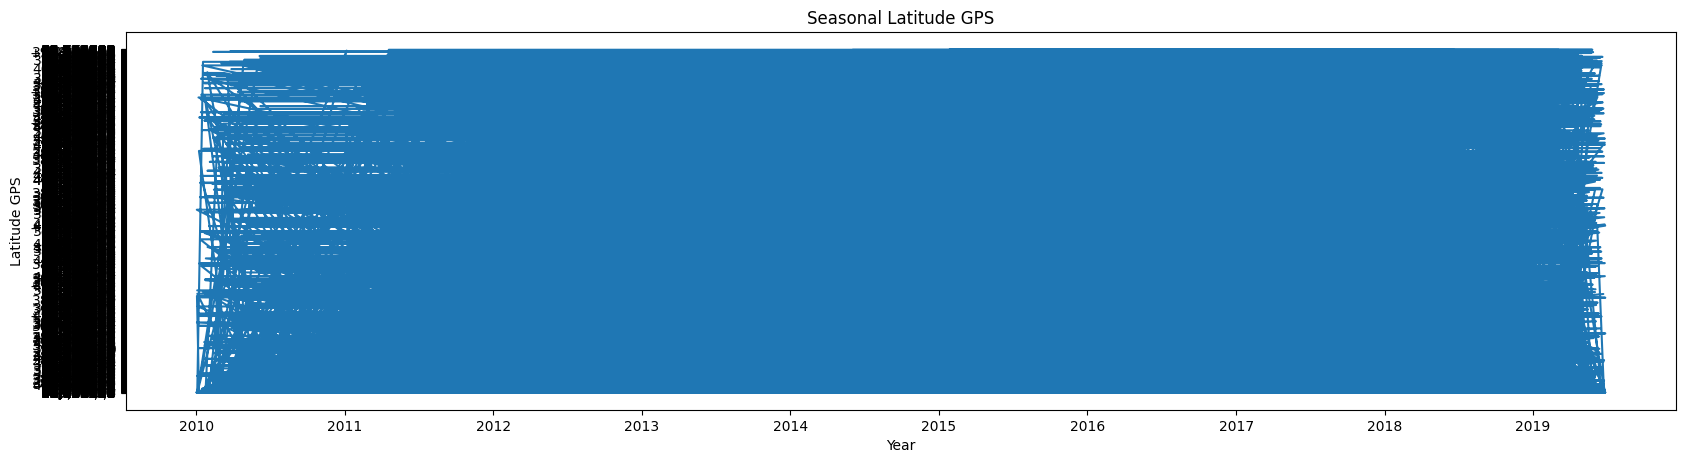

In [19]:
def plot_graph_LatitudeGPS(df, x, y, title = "", xlabel = 'Year', ylabel = 'Latitude GPS', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_LatitudeGPS(datasetLatitude, x = datasetLatitude.index, y = datasetLatitude['Latitude GPS'], title = 'Seasonal Latitude GPS')

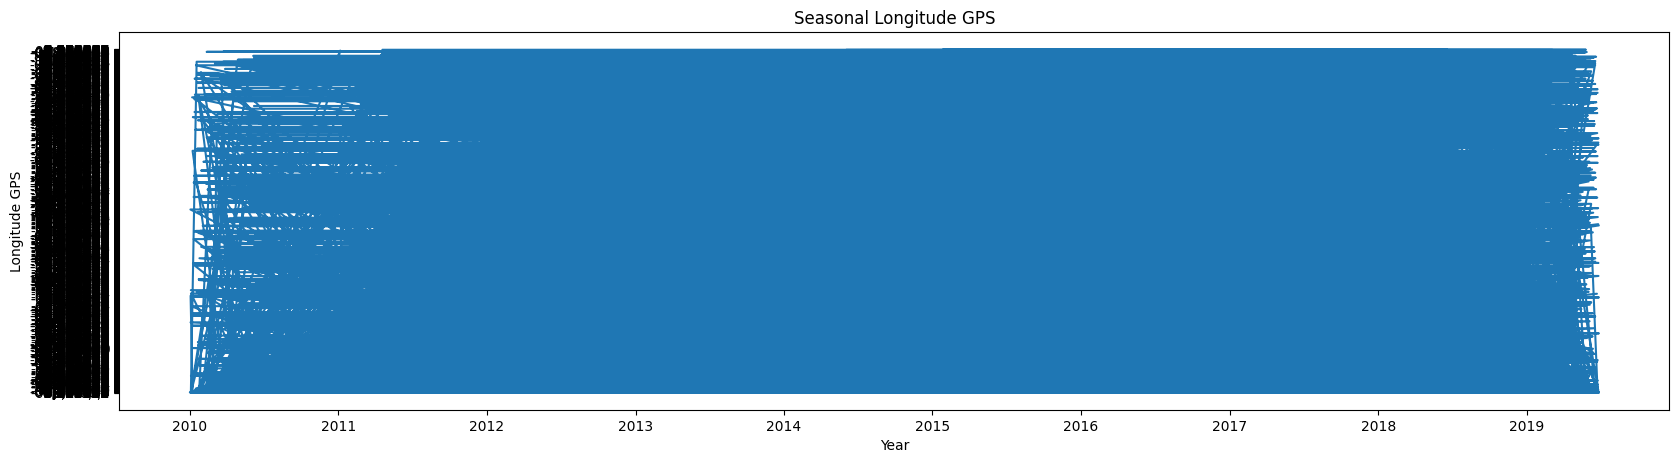

In [229]:
def plot_graph_LongitudeGPS(df, x, y, title = "", xlabel = 'Year', ylabel = 'Longitude GPS', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_LongitudeGPS(datasetLongitude, x = datasetLongitude.index, y = datasetLongitude['Longitude GPS'], title = 'Seasonal Longitude GPS')

In [230]:
# 4) Quais as caracteristicas dos ficheiros que não estão equilibradas

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")
dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")
dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

print(dfPassageirosSample['Lesões a 30 dias'].value_counts())

Ferido leve     10067
Ferido grave      386
Morto             103
Ileso              12
Name: Lesões a 30 dias, dtype: int64


In [231]:
print(dfPassageirosSample['Acessórios Passageiro'].value_counts())

C/ capacete/ cinto segurança       8669
C/ sistema retenção de crianças     963
S/ uso capacete/cinto segurança     717
NÃO DEFINIDO                        150
S/ sistema retenção de crianças      69
Name: Acessórios Passageiro, dtype: int64


In [232]:
print(dfAcidentesSample['Características Tecnicas1'].value_counts())

Estrada sem separador    9332
Outra via                1317
Auto-estrada              736
NÃO DEFINIDO               82
Name: Características Tecnicas1, dtype: int64


In [233]:
print(dfAcidentesSample['Cond Aderência'].value_counts())

Seco e limpo                              8092
Molhado                                   1864
Húmido                                    1262
Com gravilha ou areia                       83
Com água acumulada na faixa de rodagem      46
Com gelo, geada ou neve                     43
NÃO DEFINIDO                                37
Com óleo                                    28
Com lama                                    12
Name: Cond Aderência, dtype: int64


In [234]:
print(dfAcidentesSample['Tipos Vias'].value_counts())

Arruamento                      6981
EN - Estrada Nacional           2356
A  - Auto-Estrada                736
EM - Estrada Municipal           611
IC - Itinerário Complementar     280
Outra Via                        275
IP- Itinerário Principal         115
ER - Estrada Regional             53
VAR - Variante                    40
EF - Estrada Florestal            14
PNT - Ponte                        6
Name: Tipos Vias, dtype: int64


In [235]:
print(dfAcidentesSample['Factores Atmosféricos'].value_counts())

Bom tempo       8973
Chuva           2352
Nevoeiro          63
NÃO DEFINIDO      52
Vento Forte       12
Granizo           11
Neve               4
Name: Factores Atmosféricos, dtype: int64


In [236]:
print(dfPeõesSample['Tipo Natureza'].value_counts())

Atropelamento    10761
Colisão            324
Despiste           101
Name: Tipo Natureza, dtype: int64


In [237]:
print(dfPeõesSample['Natureza'].value_counts())

Atropelamento de peões                                          9992
Atropelamento com fuga                                           757
Colisão com outras situações                                     154
Despiste com colisão com veículo imobil. ou obstáculo             51
Colisão com veiculo ou obstáculo na faixa de rodagem              48
Colisão lateral com outro veículo em movimento                    43
Colisão traseira com outro veículo em movimento                   40
Colisão frontal                                                   21
Despiste simples                                                  19
Despiste sem dispositivo de retenção                              16
Colisão com fuga                                                  14
Atropelamento de animais                                          12
Despiste com capotamento                                           8
Despiste com dispositivo de retenção                               4
Colisão choque em cadeia          

In [238]:
print(dfPeõesSample['Lesões a 30 dias'].value_counts())

Ferido leve     10065
Ferido grave      793
Morto             317
Ileso              11
Name: Lesões a 30 dias, dtype: int64


In [239]:
datasetPassageirosL30 = pd.DataFrame(data = dfPassageirosSample, columns = ['Datahora', 'Lesões a 30 dias'])
datasetPassageirosL30

Datahora Lesões a 30 dias
0      2016:01:07 14:00:00      Ferido leve
1      2015:08:05 19:10:00      Ferido leve
2      2013:03:27 14:30:00      Ferido leve
3      2018:01:04 19:00:00      Ferido leve
4      2015:06:05 01:45:00      Ferido leve
...                    ...              ...
10563  2014:05:11 17:40:00      Ferido leve
10564  2010:03:27 23:00:00      Ferido leve
10565  2011:08:06 11:30:00      Ferido leve
10566  2010:07:03 02:15:00      Ferido leve
10567  2013:08:02 20:00:00      Ferido leve

[10568 rows x 2 columns]

In [240]:
datasetPassageirosAP = pd.DataFrame(data = dfPassageirosSample, columns = ['Datahora', 'Acessórios Passageiro'])
datasetPassageirosAP

Datahora         Acessórios Passageiro
0      2016:01:07 14:00:00  C/ capacete/ cinto segurança
1      2015:08:05 19:10:00  C/ capacete/ cinto segurança
2      2013:03:27 14:30:00  C/ capacete/ cinto segurança
3      2018:01:04 19:00:00  C/ capacete/ cinto segurança
4      2015:06:05 01:45:00  C/ capacete/ cinto segurança
...                    ...                           ...
10563  2014:05:11 17:40:00  C/ capacete/ cinto segurança
10564  2010:03:27 23:00:00  C/ capacete/ cinto segurança
10565  2011:08:06 11:30:00  C/ capacete/ cinto segurança
10566  2010:07:03 02:15:00  C/ capacete/ cinto segurança
10567  2013:08:02 20:00:00  C/ capacete/ cinto segurança

[10568 rows x 2 columns]

In [241]:
datasetAcidentesCT1 = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Características Tecnicas1'])
datasetAcidentesCT1

Datahora Características Tecnicas1
0      2012:06:20 13:40:00     Estrada sem separador
1      2018:05:20 15:07:00     Estrada sem separador
2      2010:01:28 04:30:00     Estrada sem separador
3      2010:06:12 20:30:00     Estrada sem separador
4      2019:05:01 16:52:00     Estrada sem separador
...                    ...                       ...
11462  2019:04:11 19:10:00     Estrada sem separador
11463  2017:05:26 17:50:00     Estrada sem separador
11464  2015:06:10 23:50:00     Estrada sem separador
11465  2011:01:15 21:50:00              NÃO DEFINIDO
11466  2015:01:28 07:30:00     Estrada sem separador

[11467 rows x 2 columns]

In [242]:
datasetAcidentesCA = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Cond Aderência'])
datasetAcidentesCA

Datahora Cond Aderência
0      2012:06:20 13:40:00   Seco e limpo
1      2018:05:20 15:07:00   Seco e limpo
2      2010:01:28 04:30:00   Seco e limpo
3      2010:06:12 20:30:00   Seco e limpo
4      2019:05:01 16:52:00   Seco e limpo
...                    ...            ...
11462  2019:04:11 19:10:00   Seco e limpo
11463  2017:05:26 17:50:00   Seco e limpo
11464  2015:06:10 23:50:00   Seco e limpo
11465  2011:01:15 21:50:00   Seco e limpo
11466  2015:01:28 07:30:00   Seco e limpo

[11467 rows x 2 columns]

In [243]:
datasetAcidentesTV = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Tipos Vias'])
datasetAcidentesTV

Datahora              Tipos Vias
0      2012:06:20 13:40:00  EM - Estrada Municipal
1      2018:05:20 15:07:00   EN - Estrada Nacional
2      2010:01:28 04:30:00   EN - Estrada Nacional
3      2010:06:12 20:30:00   EN - Estrada Nacional
4      2019:05:01 16:52:00              Arruamento
...                    ...                     ...
11462  2019:04:11 19:10:00              Arruamento
11463  2017:05:26 17:50:00              Arruamento
11464  2015:06:10 23:50:00              Arruamento
11465  2011:01:15 21:50:00              Arruamento
11466  2015:01:28 07:30:00              Arruamento

[11467 rows x 2 columns]

In [244]:
datasetAcidentesFA = pd.DataFrame(data = dfAcidentesSample, columns = ['Datahora', 'Factores Atmosféricos'])
datasetAcidentesFA

Datahora Factores Atmosféricos
0      2012:06:20 13:40:00             Bom tempo
1      2018:05:20 15:07:00             Bom tempo
2      2010:01:28 04:30:00             Bom tempo
3      2010:06:12 20:30:00             Bom tempo
4      2019:05:01 16:52:00             Bom tempo
...                    ...                   ...
11462  2019:04:11 19:10:00             Bom tempo
11463  2017:05:26 17:50:00             Bom tempo
11464  2015:06:10 23:50:00             Bom tempo
11465  2011:01:15 21:50:00             Bom tempo
11466  2015:01:28 07:30:00              Nevoeiro

[11467 rows x 2 columns]

In [245]:
datasetPeõesTN = pd.DataFrame(data = dfPeõesSample, columns = ['Datahora', 'Tipo Natureza'])
datasetPeõesTN

Datahora  Tipo Natureza
0      2016:11:17 13:30:00  Atropelamento
1      2011:02:22 17:06:00  Atropelamento
2      2011:01:22 08:10:00  Atropelamento
3      2010:04:22 14:20:00  Atropelamento
4      2015:07:24 15:05:00  Atropelamento
...                    ...            ...
11181  2012:09:27 19:40:00  Atropelamento
11182  2017:12:15 09:15:00  Atropelamento
11183  2016:06:15 11:00:00  Atropelamento
11184  2015:11:06 18:55:00  Atropelamento
11185  2018:05:05 09:45:00  Atropelamento

[11186 rows x 2 columns]

In [246]:
datasetPeõesN = pd.DataFrame(data = dfPeõesSample, columns = ['Datahora', 'Natureza'])
datasetPeõesN

Datahora                Natureza
0      2016:11:17 13:30:00  Atropelamento de peões
1      2011:02:22 17:06:00  Atropelamento de peões
2      2011:01:22 08:10:00  Atropelamento de peões
3      2010:04:22 14:20:00  Atropelamento de peões
4      2015:07:24 15:05:00  Atropelamento de peões
...                    ...                     ...
11181  2012:09:27 19:40:00  Atropelamento de peões
11182  2017:12:15 09:15:00  Atropelamento de peões
11183  2016:06:15 11:00:00  Atropelamento de peões
11184  2015:11:06 18:55:00  Atropelamento de peões
11185  2018:05:05 09:45:00  Atropelamento de peões

[11186 rows x 2 columns]

In [247]:
datasetPeõesL30 = pd.DataFrame(data = dfPeõesSample, columns = ['Datahora', 'Lesões a 30 dias'])
datasetPeõesL30

Datahora Lesões a 30 dias
0      2016:11:17 13:30:00      Ferido leve
1      2011:02:22 17:06:00            Morto
2      2011:01:22 08:10:00      Ferido leve
3      2010:04:22 14:20:00      Ferido leve
4      2015:07:24 15:05:00      Ferido leve
...                    ...              ...
11181  2012:09:27 19:40:00      Ferido leve
11182  2017:12:15 09:15:00      Ferido leve
11183  2016:06:15 11:00:00      Ferido leve
11184  2015:11:06 18:55:00      Ferido leve
11185  2018:05:05 09:45:00      Ferido leve

[11186 rows x 2 columns]

In [248]:
print(datasetPassageirosL30.dtypes)

Datahora            object
Lesões a 30 dias    object
dtype: object


In [249]:
print(datasetPassageirosAP.dtypes)

Datahora                 object
Acessórios Passageiro    object
dtype: object


In [250]:
print(datasetAcidentesCT1.dtypes)

Datahora                     object
Características Tecnicas1    object
dtype: object


In [251]:
print(datasetAcidentesCA.dtypes)

Datahora          object
Cond Aderência    object
dtype: object


In [252]:
print(datasetAcidentesTV.dtypes)

Datahora      object
Tipos Vias    object
dtype: object


In [253]:
print(datasetAcidentesFA.dtypes)

Datahora                 object
Factores Atmosféricos    object
dtype: object


In [254]:
print(datasetPeõesTN.dtypes)

Datahora         object
Tipo Natureza    object
dtype: object


In [255]:
print(datasetPeõesN.dtypes)

Datahora    object
Natureza    object
dtype: object


In [256]:
print(datasetPeõesL30.dtypes)

Datahora            object
Lesões a 30 dias    object
dtype: object


In [257]:
datasetPassageirosL30['Datahora'] = pd.to_datetime(datasetPassageirosL30['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetPassageirosL30['Datahora'].head())

0   2016-01-07 14:00:00
1   2015-08-05 19:10:00
2   2013-03-27 14:30:00
3   2018-01-04 19:00:00
4   2015-06-05 01:45:00
Name: Datahora, dtype: datetime64[ns]


In [258]:
datasetPassageirosAP['Datahora'] = pd.to_datetime(datasetPassageirosAP['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetPassageirosAP['Datahora'].head())

0   2016-01-07 14:00:00
1   2015-08-05 19:10:00
2   2013-03-27 14:30:00
3   2018-01-04 19:00:00
4   2015-06-05 01:45:00
Name: Datahora, dtype: datetime64[ns]


In [259]:
datasetAcidentesCT1['Datahora'] = pd.to_datetime(datasetAcidentesCT1['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetAcidentesCT1['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [260]:
datasetAcidentesCA['Datahora'] = pd.to_datetime(datasetAcidentesCA['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetAcidentesCA['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [261]:
datasetAcidentesTV['Datahora'] = pd.to_datetime(datasetAcidentesTV['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetAcidentesTV['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [262]:
datasetAcidentesFA['Datahora'] = pd.to_datetime(datasetAcidentesFA['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetAcidentesFA['Datahora'].head())

0   2012-06-20 13:40:00
1   2018-05-20 15:07:00
2   2010-01-28 04:30:00
3   2010-06-12 20:30:00
4   2019-05-01 16:52:00
Name: Datahora, dtype: datetime64[ns]


In [263]:
datasetPeõesTN['Datahora'] = pd.to_datetime(datasetPeõesTN['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetPeõesTN['Datahora'].head())

0   2016-11-17 13:30:00
1   2011-02-22 17:06:00
2   2011-01-22 08:10:00
3   2010-04-22 14:20:00
4   2015-07-24 15:05:00
Name: Datahora, dtype: datetime64[ns]


In [264]:
datasetPeõesN['Datahora'] = pd.to_datetime(datasetPeõesN['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetPeõesN['Datahora'].head())

0   2016-11-17 13:30:00
1   2011-02-22 17:06:00
2   2011-01-22 08:10:00
3   2010-04-22 14:20:00
4   2015-07-24 15:05:00
Name: Datahora, dtype: datetime64[ns]


In [265]:
datasetPeõesL30['Datahora'] = pd.to_datetime(datasetPeõesL30['Datahora'], format = '%Y:%m:%d %H:%M:%S')
print(datasetPeõesL30['Datahora'].head())

0   2016-11-17 13:30:00
1   2011-02-22 17:06:00
2   2011-01-22 08:10:00
3   2010-04-22 14:20:00
4   2015-07-24 15:05:00
Name: Datahora, dtype: datetime64[ns]


In [266]:
datasetPassageirosL30 = datasetPassageirosL30.set_index('Datahora')
print(datasetPassageirosL30.head())

                    Lesões a 30 dias
Datahora                            
2016-01-07 14:00:00      Ferido leve
2015-08-05 19:10:00      Ferido leve
2013-03-27 14:30:00      Ferido leve
2018-01-04 19:00:00      Ferido leve
2015-06-05 01:45:00      Ferido leve


In [267]:
datasetPassageirosAP = datasetPassageirosAP.set_index('Datahora')
print(datasetPassageirosAP.head())

                            Acessórios Passageiro
Datahora                                         
2016-01-07 14:00:00  C/ capacete/ cinto segurança
2015-08-05 19:10:00  C/ capacete/ cinto segurança
2013-03-27 14:30:00  C/ capacete/ cinto segurança
2018-01-04 19:00:00  C/ capacete/ cinto segurança
2015-06-05 01:45:00  C/ capacete/ cinto segurança


In [268]:
datasetAcidentesCT1 = datasetAcidentesCT1.set_index('Datahora')
print(datasetAcidentesCT1.head())

                    Características Tecnicas1
Datahora                                     
2012-06-20 13:40:00     Estrada sem separador
2018-05-20 15:07:00     Estrada sem separador
2010-01-28 04:30:00     Estrada sem separador
2010-06-12 20:30:00     Estrada sem separador
2019-05-01 16:52:00     Estrada sem separador


In [269]:
datasetAcidentesCA = datasetAcidentesCA.set_index('Datahora')
print(datasetAcidentesCA.head())

                    Cond Aderência
Datahora                          
2012-06-20 13:40:00   Seco e limpo
2018-05-20 15:07:00   Seco e limpo
2010-01-28 04:30:00   Seco e limpo
2010-06-12 20:30:00   Seco e limpo
2019-05-01 16:52:00   Seco e limpo


In [270]:
datasetAcidentesTV = datasetAcidentesTV.set_index('Datahora')
print(datasetAcidentesTV.head())

                                 Tipos Vias
Datahora                                   
2012-06-20 13:40:00  EM - Estrada Municipal
2018-05-20 15:07:00   EN - Estrada Nacional
2010-01-28 04:30:00   EN - Estrada Nacional
2010-06-12 20:30:00   EN - Estrada Nacional
2019-05-01 16:52:00              Arruamento


In [271]:
datasetAcidentesFA = datasetAcidentesFA.set_index('Datahora')
print(datasetAcidentesFA.head())

                    Factores Atmosféricos
Datahora                                 
2012-06-20 13:40:00             Bom tempo
2018-05-20 15:07:00             Bom tempo
2010-01-28 04:30:00             Bom tempo
2010-06-12 20:30:00             Bom tempo
2019-05-01 16:52:00             Bom tempo


In [272]:
datasetPeõesTN = datasetPeõesTN.set_index('Datahora')
print(datasetPeõesTN.head())

                     Tipo Natureza
Datahora                          
2016-11-17 13:30:00  Atropelamento
2011-02-22 17:06:00  Atropelamento
2011-01-22 08:10:00  Atropelamento
2010-04-22 14:20:00  Atropelamento
2015-07-24 15:05:00  Atropelamento


In [273]:
datasetPeõesN = datasetPeõesN.set_index('Datahora')
print(datasetPeõesN.head())

                                   Natureza
Datahora                                   
2016-11-17 13:30:00  Atropelamento de peões
2011-02-22 17:06:00  Atropelamento de peões
2011-01-22 08:10:00  Atropelamento de peões
2010-04-22 14:20:00  Atropelamento de peões
2015-07-24 15:05:00  Atropelamento de peões


In [274]:
datasetPeõesL30 = datasetPeõesL30.set_index('Datahora')
print(datasetPeõesL30.head())

                    Lesões a 30 dias
Datahora                            
2016-11-17 13:30:00      Ferido leve
2011-02-22 17:06:00            Morto
2011-01-22 08:10:00      Ferido leve
2010-04-22 14:20:00      Ferido leve
2015-07-24 15:05:00      Ferido leve


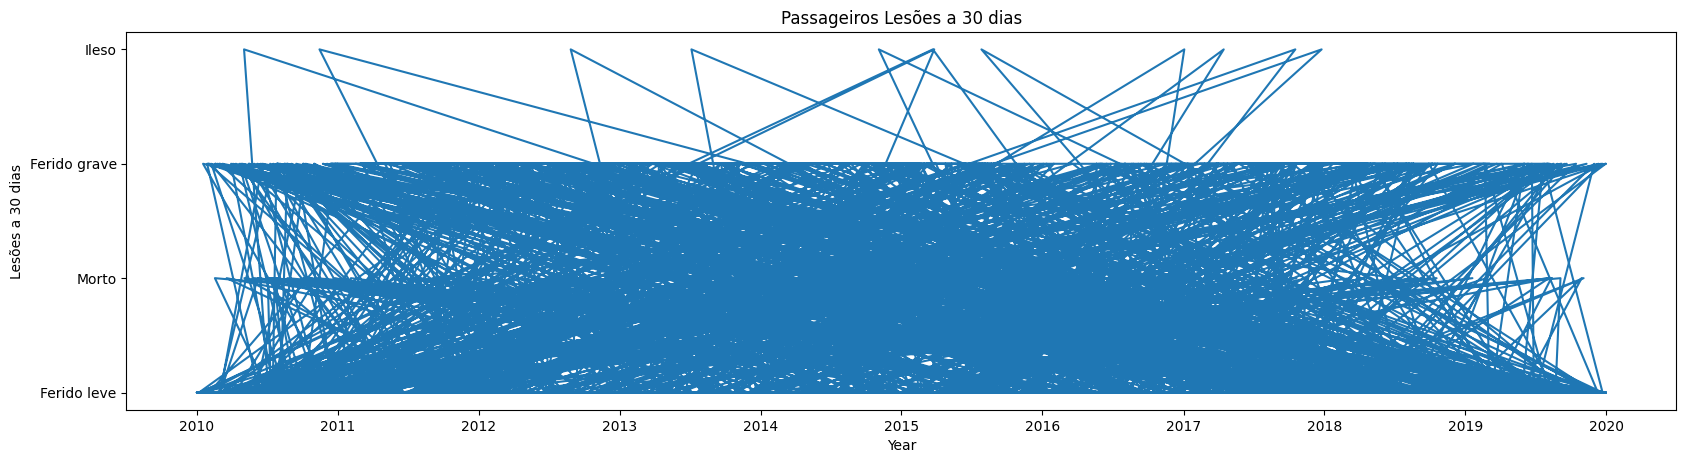

In [275]:
def plot_graph_PassageirosL30(df, x, y, title = "", xlabel = 'Year', ylabel = 'Lesões a 30 dias', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_PassageirosL30(datasetPassageirosL30, x = datasetPassageirosL30.index, y = datasetPassageirosL30['Lesões a 30 dias'], title = 'Passageiros Lesões a 30 dias')

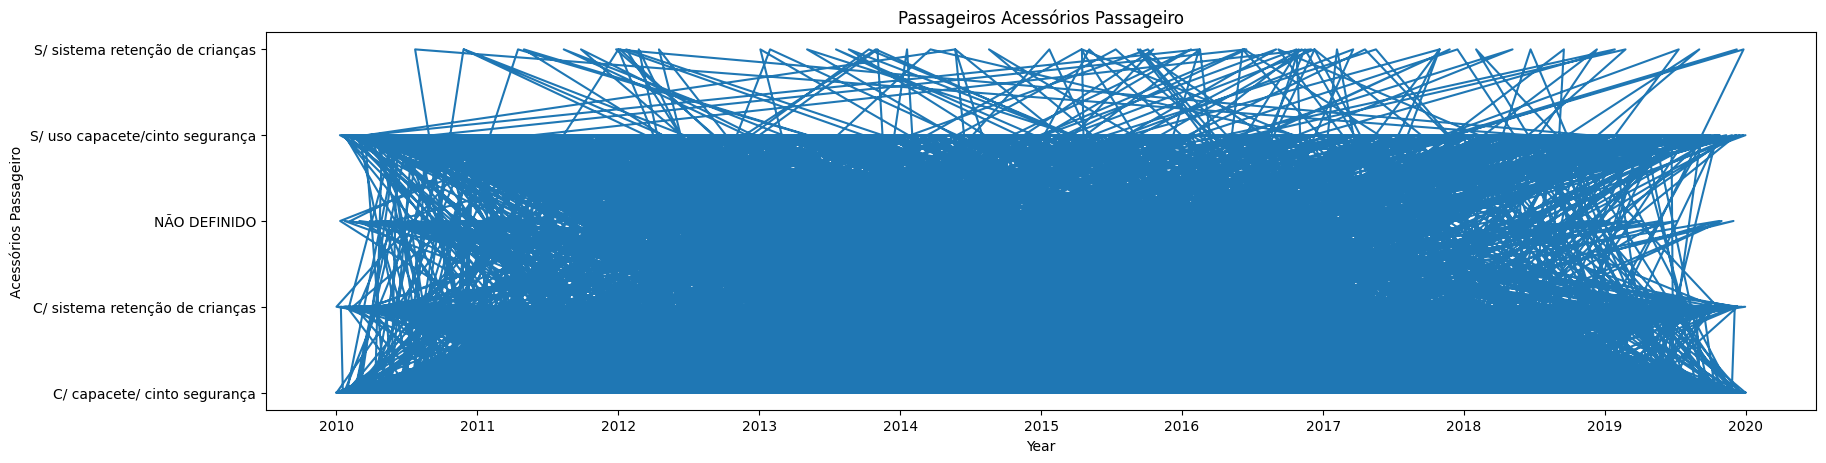

In [276]:
def plot_graph_PassageirosAcessóriosPassageiro(df, x, y, title = "", xlabel = 'Year', ylabel = 'Acessórios Passageiro', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_PassageirosAcessóriosPassageiro(datasetPassageirosAP, x = datasetPassageirosAP.index, y = datasetPassageirosAP['Acessórios Passageiro'], title = 'Passageiros Acessórios Passageiro')

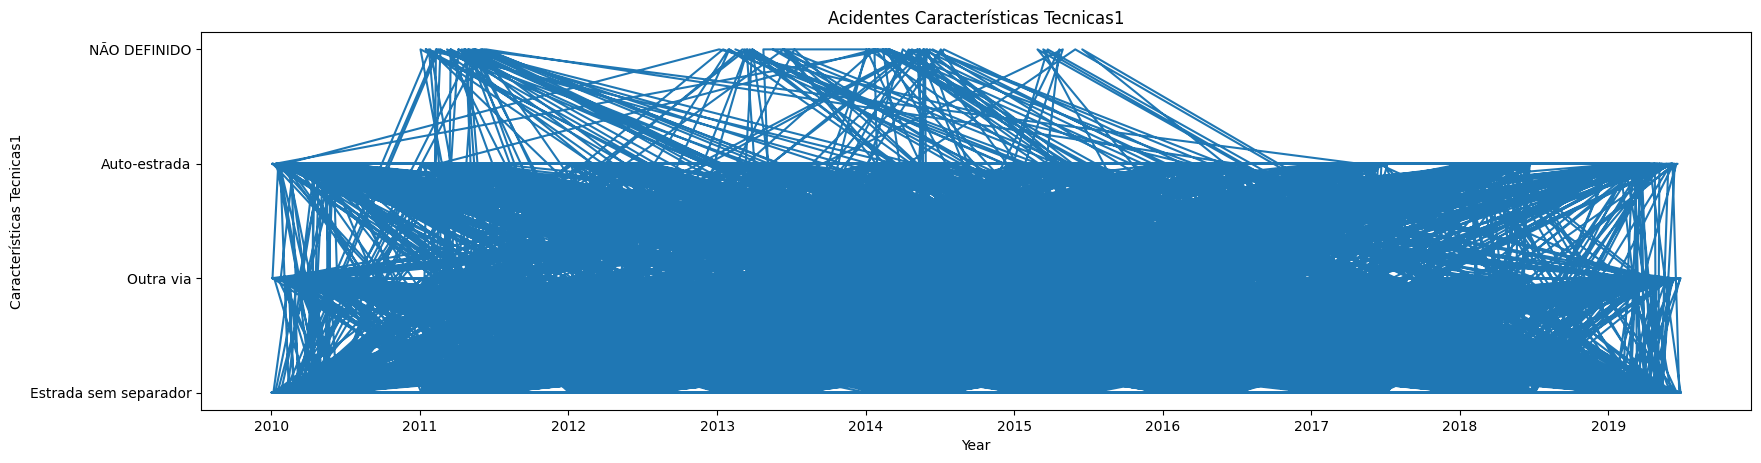

In [277]:
def plot_graph_AcidentesCaracterísticasTecnicas1(df, x, y, title = "", xlabel = 'Year', ylabel = 'Características Tecnicas1', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_AcidentesCaracterísticasTecnicas1(datasetAcidentesCT1, x = datasetAcidentesCT1.index, y = datasetAcidentesCT1['Características Tecnicas1'], title = 'Acidentes Características Tecnicas1')

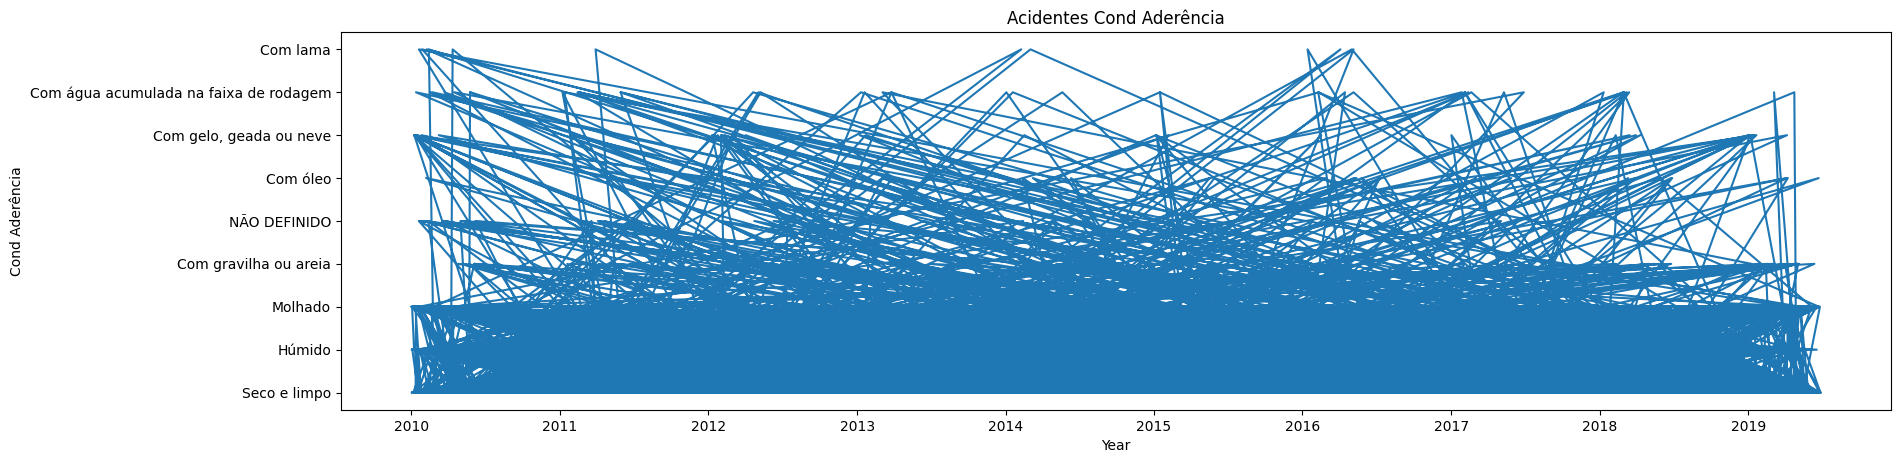

In [278]:
def plot_graph_AcidentesCondAderência(df, x, y, title = "", xlabel = 'Year', ylabel = 'Cond Aderência', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_AcidentesCondAderência(datasetAcidentesCA, x = datasetAcidentesCA.index, y = datasetAcidentesCA['Cond Aderência'], title = 'Acidentes Cond Aderência')

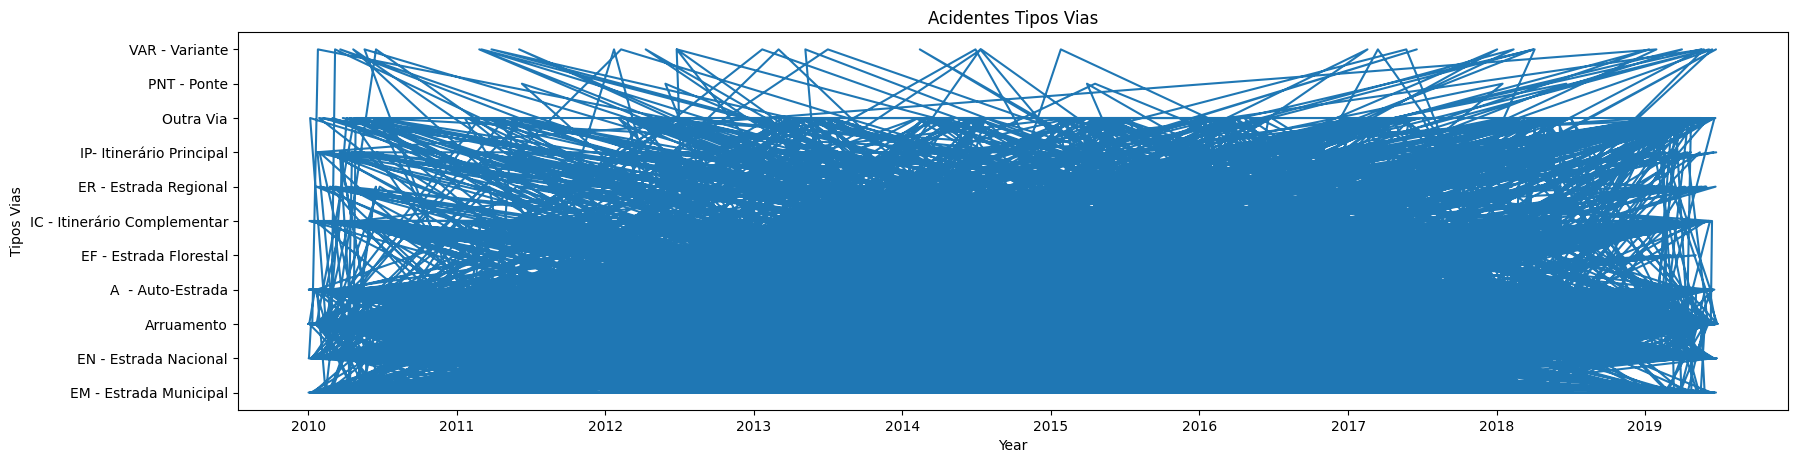

In [279]:
def plot_graph_AcidentesTiposVias(df, x, y, title = "", xlabel = 'Year', ylabel = 'Tipos Vias', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_AcidentesTiposVias(datasetAcidentesTV, x = datasetAcidentesTV.index, y = datasetAcidentesTV['Tipos Vias'], title = 'Acidentes Tipos Vias')

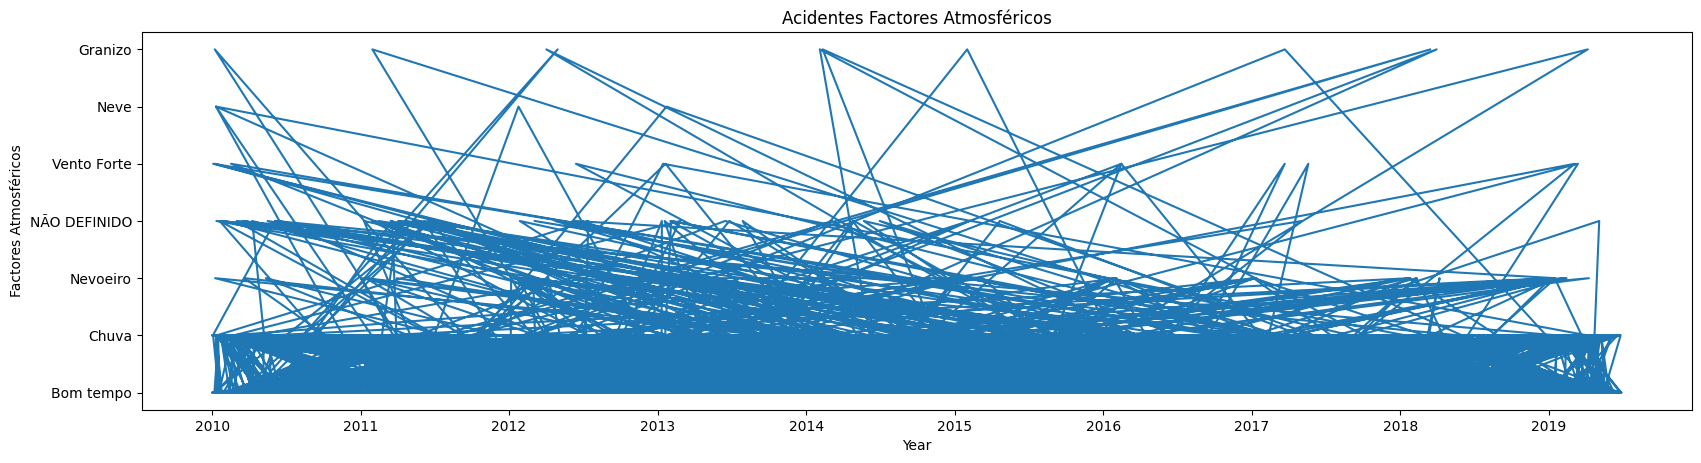

In [280]:
def plot_graph_AcidentesFactoresAtmosféricos(df, x, y, title = "", xlabel = 'Year', ylabel = 'Factores Atmosféricos', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_AcidentesFactoresAtmosféricos(datasetAcidentesFA, x = datasetAcidentesFA.index, y = datasetAcidentesFA['Factores Atmosféricos'], title = 'Acidentes Factores Atmosféricos')

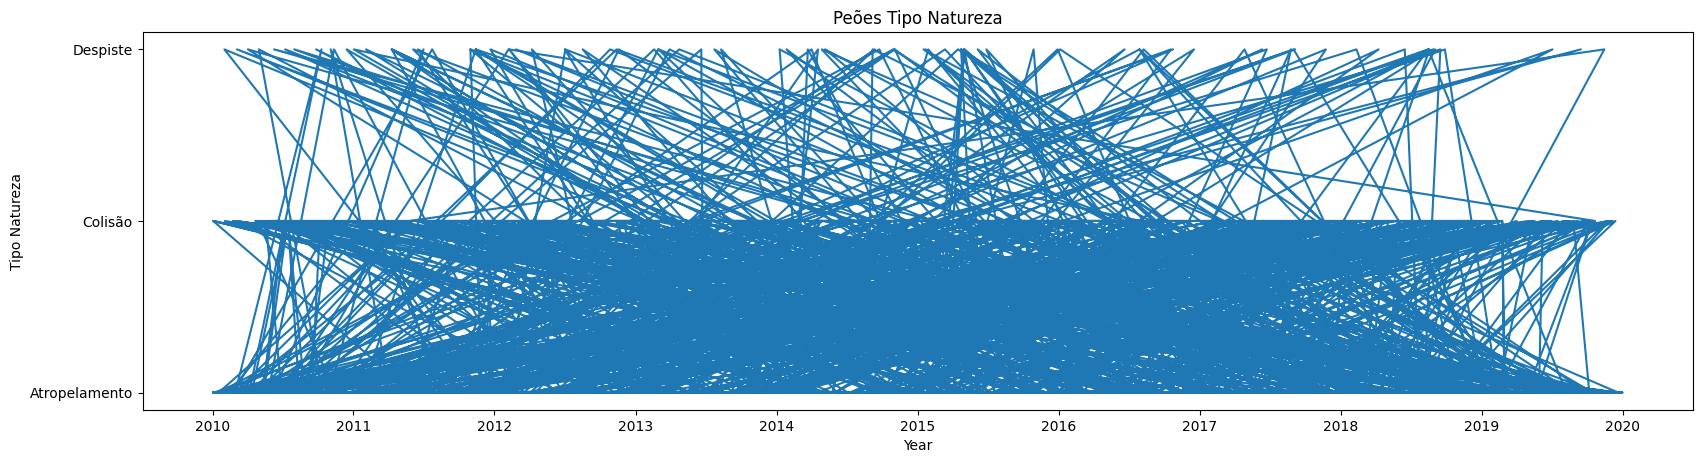

In [281]:
def plot_graph_PeõesTipoNatureza(df, x, y, title = "", xlabel = 'Year', ylabel = 'Tipo Natureza', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_PeõesTipoNatureza(datasetPeõesTN, x = datasetPeõesTN.index, y = datasetPeõesTN['Tipo Natureza'], title = 'Peões Tipo Natureza')

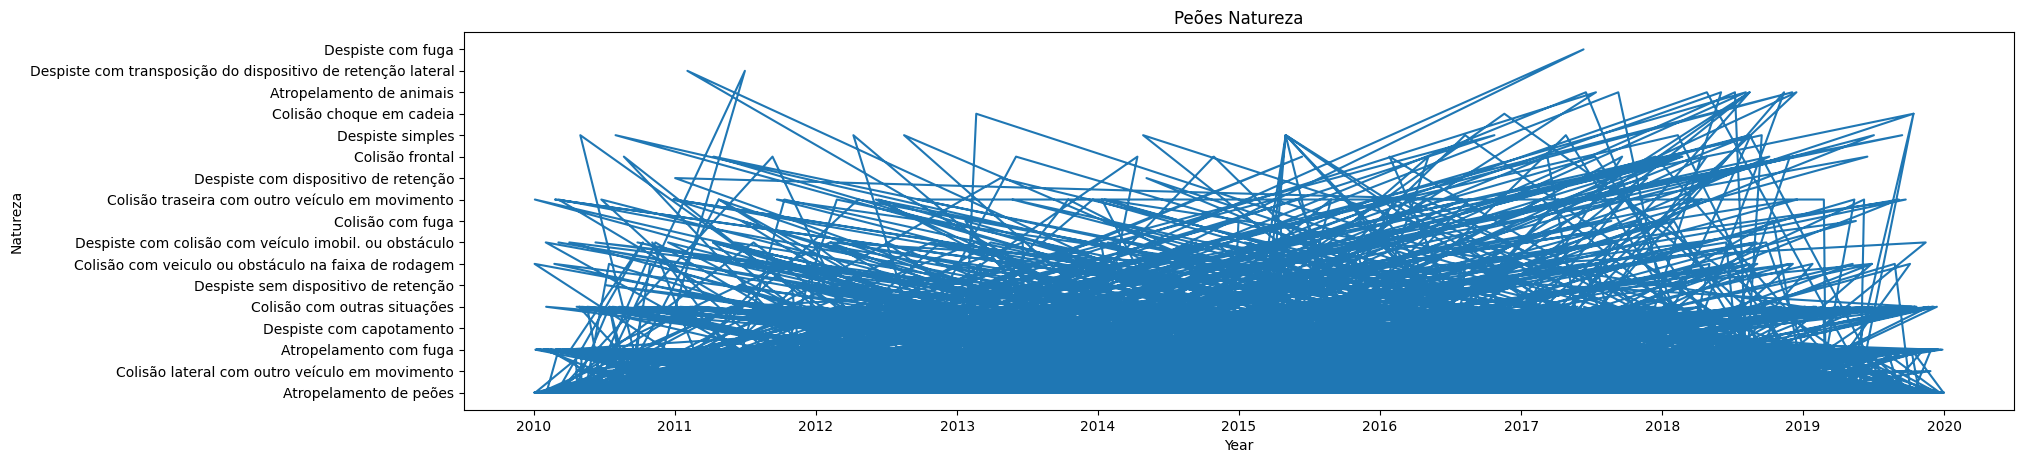

In [282]:
def plot_graph_PeõesNatureza(df, x, y, title = "", xlabel = 'Year', ylabel = 'Natureza', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_PeõesNatureza(datasetPeõesN, x = datasetPeõesN.index, y = datasetPeõesN['Natureza'], title = 'Peões Natureza')

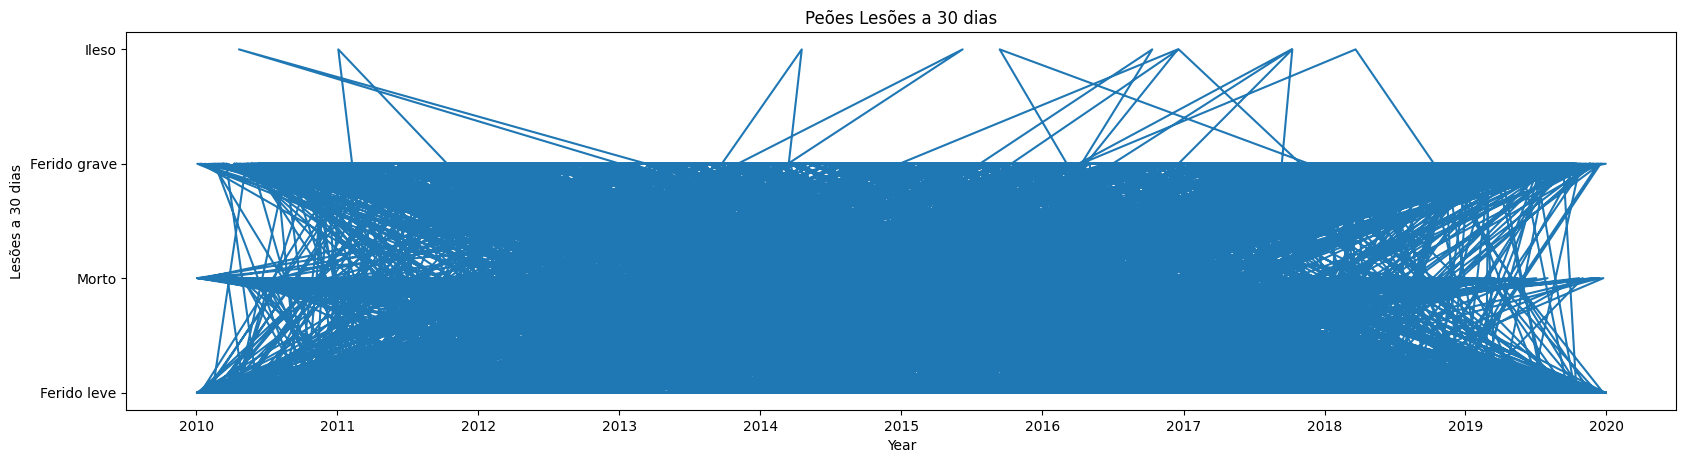

In [283]:
def plot_graph_PeõesL30(df, x, y, title = "", xlabel = 'Year', ylabel = 'Lesões a 30 dias', dpi = 100):
    plt.figure(figsize = (20,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:blue')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_graph_PeõesL30(datasetPeõesL30, x = datasetPeõesL30.index, y = datasetPeõesL30['Lesões a 30 dias'], title = 'Peões Lesões a 30 dias')

In [112]:
# 5) Correlação entre variaveis dos três ficheiros
# Na correlação do ficheiro AcidentesExcelRandomSample.xlsx consegue-se verificar valores altos de correlação (quando corr-
# elação Velocidade local = 1 -> correlação Velocidade geral ~= 0.88 e o aposto também se verifica) porque têm uma forte 
# correlação positiva basicamente isto é quando o valor da Velocidade local aumenta, o valor da Velociadade geral também
# aumenta de uma maneira similar. As duas variaveis estão relacionadas uma com a outra.

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")

correlationdfPassageirosSample = dfPassageirosSample.corr()
correlationdfPassageirosSample

<ipython-input-112-b184a123db90>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationdfPassageirosSample = dfPassageirosSample.corr()


Id. Acidente  Id. Passageiro  \
Id. Acidente                            1.000000       -0.009039   
Id. Passageiro                         -0.009039        1.000000   
Passageiro Gr.Etario(<=5) SUM          -0.003670        0.021514   
Passageiro Gr.Etario(6-9) SUM           0.002311        0.026686   
Passageiro Gr.Etario(10-14) SUM        -0.003156        0.043894   
Passageiro Gr.Etario(15-17) SUM        -0.010330        0.012270   
Passageiro Gr.Etario(18-20) SUM        -0.013016       -0.004673   
Passageiro Gr.Etario(21-24) SUM         0.010157       -0.011490   
Passageiro Gr.Etario(25-29) SUM         0.009968       -0.005140   
Passageiro Gr.Etario(30-34) SUM        -0.021728        0.000900   
Passageiro Gr.Etario(35-39) SUM        -0.003610       -0.004327   
Passageiro Gr.Etario(40-44) SUM         0.003594       -0.004040   
Passageiro Gr.Etario(45-49) SUM        -0.005331       -0.009972   
Passageiro Gr.Etario(50-54) SUM        -0.000685       -0.008730   
Passageiro Gr.Etario(55-59) SUM         0.012726       -0.021655   
Passageiro Gr.Etario(60-64) SUM         0.015127       -0.010264   
Passageiro Gr.Etario(65-69) SUM        -0.001596       -0.012317   
Passageiro Gr.Etario(70-74) SUM        -0.015933       -0.016550   
Passageiro Gr.Etario(>=75) SUM          0.031379       -0.018645   
Passageiro Gr.Etario(Não Def.) SUM     -0.033395        0.034521   

                                    Passageiro Gr.Etario(<=5) SUM  \
Id. Acidente                                            -0.003670   
Id. Passageiro                                           0.021514   
Passageiro Gr.Etario(<=5) SUM                            1.000000   
Passageiro Gr.Etario(6-9) SUM                           -0.050556   
Passageiro Gr.Etario(10-14) SUM                         -0.061378   
Passageiro Gr.Etario(15-17) SUM                         -0.055015   
Passageiro Gr.Etario(18-20) SUM                         -0.073470   
Passageiro Gr.Etario(21-24) SUM                         -0.076553   
Passageiro Gr.Etario(25-29) SUM                         -0.068010   
Passageiro Gr.Etario(30-34) SUM                         -0.062617   
Passageiro Gr.Etario(35-39) SUM                         -0.058944   
Passageiro Gr.Etario(40-44) SUM                         -0.060018   
Passageiro Gr.Etario(45-49) SUM                         -0.057383   
Passageiro Gr.Etario(50-54) SUM                         -0.056907   
Passageiro Gr.Etario(55-59) SUM                         -0.055733   
Passageiro Gr.Etario(60-64) SUM                         -0.053546   
Passageiro Gr.Etario(65-69) SUM                         -0.051399   
Passageiro Gr.Etario(70-74) SUM                         -0.048577   
Passageiro Gr.Etario(>=75) SUM                          -0.062716   
Passageiro Gr.Etario(Não Def.) SUM                      -0.012114   

                                    Passageiro Gr.Etario(6-9) SUM  \
Id. Acidente                                             0.002311   
Id. Passageiro                                           0.026686   
Passageiro Gr.Etario(<=5) SUM                           -0.050556   
Passageiro Gr.Etario(6-9) SUM                            1.000000   
Passageiro Gr.Etario(10-14) SUM                         -0.052830   
Passageiro Gr.Etario(15-17) SUM                         -0.050397   
Passageiro Gr.Etario(18-20) SUM                         -0.067702   
Passageiro Gr.Etario(21-24) SUM                         -0.070543   
Passageiro Gr.Etario(25-29) SUM                         -0.062670   
Passageiro Gr.Etario(30-34) SUM                         -0.057701   
Passageiro Gr.Etario(35-39) SUM                         -0.052384   
Passageiro Gr.Etario(40-44) SUM                         -0.055305   
Passageiro Gr.Etario(45-49) SUM                         -0.052878   
Passageiro Gr.Etario(50-54) SUM                         -0.052439   
Passageiro Gr.Etario(55-59) SUM                         -0.051357   
Passageiro Gr.Etario(60-64) SUM                      

In [113]:
correlationdfPassageirosSample.style.background_gradient(cmap = 'coolwarm')

In [114]:
dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")

correlationdfAcidentesSample = dfAcidentesSample.corr()
correlationdfAcidentesSample

<ipython-input-114-9a4173d1b1f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationdfAcidentesSample = dfAcidentesSample.corr()


Id. Acidente  Velocidade local  \
Id. Acidente                         1.000000         -0.031027   
Velocidade local                    -0.031027          1.000000   
Velocidade geral                    -0.035779          0.889877   
Num. Mortos a 30 dias               -0.014544          0.042424   
Num. Feridos graves a 30 dias       -0.004623          0.059859   
Num. Feridos ligeiros a 30 dias     -0.012764          0.064953   
Km                                   0.008701          0.047846   

                                 Velocidade geral  Num. Mortos a 30 dias  \
Id. Acidente                            -0.035779              -0.014544   
Velocidade local                         0.889877               0.042424   
Velocidade geral                         1.000000               0.040699   
Num. Mortos a 30 dias                    0.040699               1.000000   
Num. Feridos graves a 30 dias            0.052893               0.092956   
Num. Feridos ligeiros a 30 dias          0.072654              -0.188656   
Km                                       0.029959               0.006248   

                                 Num. Feridos graves a 30 dias  \
Id. Acidente                                         -0.004623   
Velocidade local                                      0.059859   
Velocidade geral                                      0.052893   
Num. Mortos a 30 dias                                 0.092956   
Num. Feridos graves a 30 dias                         1.000000   
Num. Feridos ligeiros a 30 dias                      -0.226785   
Km                                                    0.036551   

                                 Num. Feridos ligeiros a 30 dias        Km  
Id. Acidente                                           -0.012764  0.008701  
Velocidade local                                        0.064953  0.047846  
Velocidade geral                                        0.072654  0.029959  
Num. Mortos a 30 dias                                  -0.188656  0.006248  
Num. Feridos graves a 30 dias                          -0.226785  0.036551  
Num. Feridos ligeiros a 30 dias                         1.000000 -0.016238  
Km                                                     -0.016238  1.000000

In [115]:
correlationdfAcidentesSample.style.background_gradient(cmap = 'coolwarm')

In [116]:
dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

correlationdfPeõesSample = dfPeõesSample.corr()
correlationdfPeõesSample

<ipython-input-116-913924dd2469>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationdfPeõesSample = dfPeõesSample.corr()


Id. Acidente  Id. Peao  Peao Gr.Etario(<=5) SUM  \
Id. Acidente                      1.000000  0.037344                -0.016182   
Id. Peao                          0.037344  1.000000                 0.070362   
Peao Gr.Etario(<=5) SUM          -0.016182  0.070362                 1.000000   
Peao Gr.Etario(6-9) SUM          -0.017613  0.029026                -0.029386   
Peao Gr.Etario(10-14) SUM        -0.013658  0.016495                -0.046841   
Peao Gr.Etario(15-17) SUM        -0.007720  0.027238                -0.038547   
Peao Gr.Etario(18-20) SUM         0.010295  0.015984                -0.035063   
Peao Gr.Etario(21-24) SUM         0.003961 -0.008931                -0.035338   
Peao Gr.Etario(25-29) SUM         0.017354  0.000116                -0.034905   
Peao Gr.Etario(30-34) SUM        -0.010558  0.006847                -0.033578   
Peao Gr.Etario(35-39) SUM        -0.017540 -0.006766                -0.037515   
Peao Gr.Etario(40-44) SUM         0.012996 -0.007710                -0.038474   
Peao Gr.Etario(45-49) SUM        -0.008990  0.005422                -0.040933   
Peao Gr.Etario (50-54) SUM       -0.005032 -0.001848                -0.044109   
Peao Gr.Etario (55-59) SUM        0.019634 -0.003911                -0.045055   
Peao Gr.Etario (60-64) SUM        0.000836 -0.025244                -0.046114   
Peao Gr.Etario (65-69) SUM        0.007128 -0.022405                -0.046050   
Peao Gr.Etario (70-74) SUM        0.008611  0.001451                -0.047155   
Peao Gr.Etario (>=75) SUM         0.004504 -0.038977                -0.074372   
Peao Gr.Etario(Não Def.) SUM     -0.002422  0.003248                -0.004509   

                              Peao Gr.Etario(6-9) SUM  \
Id. Acidente                                -0.017613   
Id. Peao                                     0.029026   
Peao Gr.Etario(<=5) SUM                     -0.029386   
Peao Gr.Etario(6-9) SUM                      1.000000   
Peao Gr.Etario(10-14) SUM                   -0.048454   
Peao Gr.Etario(15-17) SUM                   -0.039874   
Peao Gr.Etario(18-20) SUM                   -0.036270   
Peao Gr.Etario(21-24) SUM                   -0.036554   
Peao Gr.Etario(25-29) SUM                   -0.036106   
Peao Gr.Etario(30-34) SUM                   -0.034734   
Peao Gr.Etario(35-39) SUM                   -0.038806   
Peao Gr.Etario(40-44) SUM                   -0.039799   
Peao Gr.Etario(45-49) SUM                   -0.042342   
Peao Gr.Etario (50-54) SUM                  -0.045628   
Peao Gr.Etario (55-59) SUM                  -0.046606   
Peao Gr.Etario (60-64) SUM                  -0.047701   
Peao Gr.Etario (65-69) SUM                  -0.047635   
Peao Gr.Etario (70-74) SUM                  -0.048778   
Peao Gr.Etario (>=75) SUM                   -0.076932   
Peao Gr.Etario(Não Def.) SUM                -0.004664   

                              Peao Gr.Etario(10-14) SUM  \
Id. Acidente                                  -0.013658   
Id. Peao                                       0.016495   
Peao Gr.Etario(<=5) SUM                       -0.046841   
Peao Gr.Etario(6-9) SUM                       -0.048454   
Peao Gr.Etario(10-14) SUM                      1.000000   
Peao Gr.Etario(15-17) SUM                     -0.063559   
Peao Gr.Etario(18-20) SUM                     -0.057813   
Peao Gr.Etario(21-24) SUM                     -0.058267   
Peao Gr.Etario(25-29) SUM                     -0.057553   
Peao Gr.Etario(30-34) SUM                     -0.055365   
Peao Gr.Etario(35-39) SUM                     -0.061856   
Peao Gr.Etario(40-44) SUM                     -0.063438   
Peao Gr.Etario(45-49) SUM                     -0.067492   
Peao Gr.Etario (50-54) SUM                    -0.072730   
Peao Gr.Etario (55-59) SUM                    -0.074289   
Peao Gr.Etario (60-64) SUM                    -0.076035   
Peao Gr.Etario (65-69) SUM                    -0.075930   
Peao Gr.Etario (70-74) SUM                    -0.077752   
Peao Gr.E

In [117]:
correlationdfPeõesSample.style.background_gradient(cmap = 'coolwarm')

In [338]:
# 6) Using K-Means and DBScan

# K-Means
# A escolha do valor de k no K-Means têm a haver com o método do cotovelo, o valor de k vai ser 4 porque no gráfico "The 
# Elbow Method" o valor 4 corresponde ao cotovelo. 

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")
dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")
dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

dfAcidentesSample.head()

Id. Acidente             Datahora                  Dia  \
0    2012623775  2012:06:20 13:40:00  1900-01-20 00:00:00   
1   20181418537  2018:05:20 15:07:00  1900-01-20 00:00:00   
2    2010441943  2010:01:28 04:30:00  1900-01-28 00:00:00   
3    2010470189  2010:06:12 20:30:00  1900-01-12 00:00:00   
4   20191736527  2019:05:01 16:52:00             00:00:00   

                   Mês      Hora     Entidades Fiscalizadoras  \
0  1900-06-01 00:00:00  13:40:00  Guarda Nacional Republicana   
1  1900-05-01 00:00:00  15:07:00  Guarda Nacional Republicana   
2             00:00:00  04:30:00  Guarda Nacional Republicana   
3  1900-06-01 00:00:00  20:30:00  Guarda Nacional Republicana   
4  1900-05-01 00:00:00  16:52:00  Guarda Nacional Republicana   

   Velocidade local  Velocidade geral  Dia da Semana Latitude GPS  ...  \
0          0.363636               0.3  Quarta-Feira           NaN  ...   
1          0.727273               0.7  Domingo          41,083558  ...   
2          0.818182               0.8  Quinta-Feira     41,582826  ...   
3          0.363636               0.3  Sábado           41,036695  ...   
4          0.363636               0.3  Quarta-Feira     39,616940  ...   

     Obstáculos      Sentidos        Sinais  Sinais Luminosos   Tipo Piso  \
0  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
1  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
2  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
3  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
4  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   

  Traçado 1   Traçado 2                  Traçado 3     Traçado 4 Via Trânsito  
0     Recta  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
1     Curva  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
2     Recta  Em patamar          Berma pavimentada  Em plena via      Direita  
3     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  
4     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  

[5 rows x 43 columns]

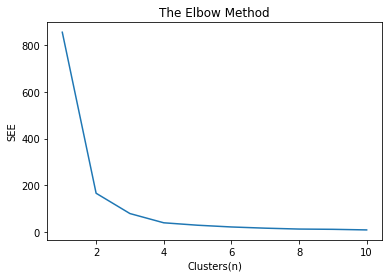

In [339]:
SEE = []
dataset = pd.DataFrame(data = dfAcidentesSample, columns = ['Velocidade local', 'Velocidade geral'])
dataset = dataset.dropna()
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    SEE.append(kmeans.inertia_)
plt.plot(range(1,11), SEE)
plt.title('The Elbow Method')
plt.xlabel('Clusters(n)')
plt.ylabel('SEE')
plt.show()

In [340]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(dataset)

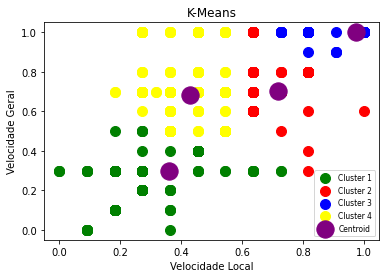

In [353]:
dataset = np.array(dataset)
plt.scatter(dataset[y_predict == 0, 0], dataset[y_predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(dataset[y_predict == 1, 0], dataset[y_predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(dataset[y_predict == 2, 0], dataset[y_predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(dataset[y_predict == 3, 0], dataset[y_predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroid')
plt.title('K-Means')
plt.xlabel('Velocidade Local')
plt.ylabel('Velocidade Geral')
plt.legend(loc = 4, prop = {'size': 7.5})
plt.show()

In [7]:
# DBSCAN

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")
dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")
dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

dfPassageirosSample.head()

Id. Acidente             Datahora      Entidades Fiscalizadoras  \
0   20161015594  2016:01:07 14:00:00  Polícia de Segurança Pública   
1    2015998328  2015:08:05 19:10:00   Guarda Nacional Republicana   
2    2013696018  2013:03:27 14:30:00   Guarda Nacional Republicana   
3   20181365028  2018:01:04 19:00:00   Guarda Nacional Republicana   
4    2015950259  2015:06:05 01:45:00  Polícia de Segurança Pública   

   Id. Passageiro Lesões a 30 dias       Sexo Posição Veiculo  \
0               1      Ferido leve   Feminino        À frente   
1               2      Ferido leve   Feminino        À frente   
2               3      Ferido leve   Feminino    Desconhecido   
3               1      Ferido leve  Masculino        À frente   
4               1      Ferido leve  Masculino   À rectaguarda   

          Acessórios Passageiro Distrito          Concelho  ...  \
0  C/ capacete/ cinto segurança    Porto             Porto  ...   
1  C/ capacete/ cinto segurança  Coimbra  Montemor-o-Velho  ...   
2  C/ capacete/ cinto segurança    Braga              Fafe  ...   
3  C/ capacete/ cinto segurança    Porto        Felgueiras  ...   
4  C/ capacete/ cinto segurança  Coimbra           Coimbra  ...   

   Passageiro Gr.Etario(35-39) SUM  Passageiro Gr.Etario(40-44) SUM  \
0                                0                                0   
1                                0                                0   
2                                1                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(45-49) SUM  Passageiro Gr.Etario(50-54) SUM  \
0                                0                                0   
1                                1                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(55-59) SUM  Passageiro Gr.Etario(60-64) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(65-69) SUM  Passageiro Gr.Etario(70-74) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(>=75) SUM  Passageiro Gr.Etario(Não Def.) SUM  
0                               0                                   0  
1                               0                                   0  
2                               0                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 28 columns]

In [8]:
dfAcidentesSample.head()

Id. Acidente             Datahora                  Dia  \
0    2012623775  2012:06:20 13:40:00  1900-01-20 00:00:00   
1   20181418537  2018:05:20 15:07:00  1900-01-20 00:00:00   
2    2010441943  2010:01:28 04:30:00  1900-01-28 00:00:00   
3    2010470189  2010:06:12 20:30:00  1900-01-12 00:00:00   
4   20191736527  2019:05:01 16:52:00             00:00:00   

                   Mês      Hora     Entidades Fiscalizadoras  \
0  1900-06-01 00:00:00  13:40:00  Guarda Nacional Republicana   
1  1900-05-01 00:00:00  15:07:00  Guarda Nacional Republicana   
2             00:00:00  04:30:00  Guarda Nacional Republicana   
3  1900-06-01 00:00:00  20:30:00  Guarda Nacional Republicana   
4  1900-05-01 00:00:00  16:52:00  Guarda Nacional Republicana   

   Velocidade local  Velocidade geral  Dia da Semana Latitude GPS  ...  \
0          0.363636               0.3  Quarta-Feira           NaN  ...   
1          0.727273               0.7  Domingo          41,083558  ...   
2          0.818182               0.8  Quinta-Feira     41,582826  ...   
3          0.363636               0.3  Sábado           41,036695  ...   
4          0.363636               0.3  Quarta-Feira     39,616940  ...   

     Obstáculos      Sentidos        Sinais  Sinais Luminosos   Tipo Piso  \
0  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
1  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
2  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
3  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
4  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   

  Traçado 1   Traçado 2                  Traçado 3     Traçado 4 Via Trânsito  
0     Recta  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
1     Curva  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
2     Recta  Em patamar          Berma pavimentada  Em plena via      Direita  
3     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  
4     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  

[5 rows x 43 columns]

In [9]:
dfPeõesSample.head()

Id. Acidente                                          Freguesia  \
0   20161123561  União das freguesias de Oeiras e São Julião da...   
1    2011522323                                            Paderne   
2    2011508472                                               Ovar   
3    2010459308                                      Olhos de Água   
4    2015961213                                  Santa Maria Maior   

   Tipo Natureza                Natureza             Datahora  \
0  Atropelamento  Atropelamento de peões  2016:11:17 13:30:00   
1  Atropelamento  Atropelamento de peões  2011:02:22 17:06:00   
2  Atropelamento  Atropelamento de peões  2011:01:22 08:10:00   
3  Atropelamento  Atropelamento de peões  2010:04:22 14:20:00   
4  Atropelamento  Atropelamento de peões  2015:07:24 15:05:00   

       Entidades Fiscalizadoras  Id. Peao       Sexo  \
0  Polícia de Segurança Pública         1   Feminino   
1   Guarda Nacional Republicana         1   Feminino   
2  Polícia de Segurança Pública         1  Masculino   
3   Guarda Nacional Republicana         1  Masculino   
4  Polícia de Segurança Pública         1   Feminino   

                                         Acções Peão          Distrito  ...  \
0                Atravessando em passagem sinalizada            Lisboa  ...   
1  Surgindo inesperadamente na faixa de rodagem d...  Viana do Castelo  ...   
2  Atravessando fora da passagem de peões, a meno...            Aveiro  ...   
3                          Em plena faixa de rodagem              Faro  ...   
4                Atravessando em passagem sinalizada            Lisboa  ...   

  Peao Gr.Etario(35-39) SUM Peao Gr.Etario(40-44) SUM  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         1                         0   
4                         0                         0   

   Peao Gr.Etario(45-49) SUM  Peao Gr.Etario (50-54) SUM  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Peao Gr.Etario (55-59) SUM  Peao Gr.Etario (60-64) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           1                           0   

   Peao Gr.Etario (65-69) SUM  Peao Gr.Etario (70-74) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           0   
4                           0                           0   

   Peao Gr.Etario (>=75) SUM  Peao Gr.Etario(Não Def.) SUM  
0                          1                             0  
1                          1                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 30 columns]

In [10]:
dataset = pd.DataFrame(data = dfAcidentesSample, columns = ['Velocidade local', 'Velocidade geral'])
dataset = dataset.dropna()
dataset

Velocidade local  Velocidade geral
0              0.363636               0.3
1              0.727273               0.7
2              0.818182               0.8
3              0.363636               0.3
4              0.363636               0.3
...                 ...               ...
11462          0.363636               0.3
11463          0.363636               0.3
11464          0.363636               0.3
11465          0.363636               0.3
11466          0.363636               0.3

[11363 rows x 2 columns]

In [11]:
dbscan = DBSCAN()
clusters = dbscan.fit(dataset)

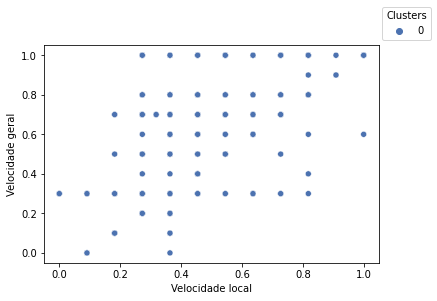

In [12]:
DBSCANplot = sns.scatterplot(data = dataset, x = 'Velocidade local', y = 'Velocidade geral', hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(DBSCANplot, "upper right", bbox_to_anchor = (1.17, 1.2), title = "Clusters")
plt.show()

In [284]:
# 8) Testar três partições de treino/validação usando K-Fold cross-validation e outros dois cross-validations

# K-Fold cross-validation

dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")

dfAcidentesSample.head()

Id. Acidente             Datahora                  Dia  \
0    2012623775  2012:06:20 13:40:00  1900-01-20 00:00:00   
1   20181418537  2018:05:20 15:07:00  1900-01-20 00:00:00   
2    2010441943  2010:01:28 04:30:00  1900-01-28 00:00:00   
3    2010470189  2010:06:12 20:30:00  1900-01-12 00:00:00   
4   20191736527  2019:05:01 16:52:00             00:00:00   

                   Mês      Hora     Entidades Fiscalizadoras  \
0  1900-06-01 00:00:00  13:40:00  Guarda Nacional Republicana   
1  1900-05-01 00:00:00  15:07:00  Guarda Nacional Republicana   
2             00:00:00  04:30:00  Guarda Nacional Republicana   
3  1900-06-01 00:00:00  20:30:00  Guarda Nacional Republicana   
4  1900-05-01 00:00:00  16:52:00  Guarda Nacional Republicana   

   Velocidade local  Velocidade geral  Dia da Semana Latitude GPS  ...  \
0          0.363636               0.3  Quarta-Feira           NaN  ...   
1          0.727273               0.7  Domingo          41,083558  ...   
2          0.818182               0.8  Quinta-Feira     41,582826  ...   
3          0.363636               0.3  Sábado           41,036695  ...   
4          0.363636               0.3  Quarta-Feira     39,616940  ...   

     Obstáculos      Sentidos        Sinais  Sinais Luminosos   Tipo Piso  \
0  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
1  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
2  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
3  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
4  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   

  Traçado 1   Traçado 2                  Traçado 3     Traçado 4 Via Trânsito  
0     Recta  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
1     Curva  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
2     Recta  Em patamar          Berma pavimentada  Em plena via      Direita  
3     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  
4     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  

[5 rows x 43 columns]

In [285]:
dataset = pd.DataFrame(data = dfAcidentesSample, columns = ['Entidades Fiscalizadoras', 'Velocidade local', 'Velocidade geral', 'Dia da Semana', 'Estado Conservação', 'Factores Atmosféricos', 'Luminosidade'])
dataset = dataset.dropna()
label = LabelEncoder()
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Dia da Semana'] = label.fit_transform(dataset['Dia da Semana'])
dataset['Estado Conservação'] = label.fit_transform(dataset['Estado Conservação'])
dataset['Factores Atmosféricos'] = label.fit_transform(dataset['Factores Atmosféricos'])
dataset['Luminosidade'] = label.fit_transform(dataset['Luminosidade'])
dataset

Entidades Fiscalizadoras  Velocidade local  Velocidade geral  \
0                             0          0.363636               0.3   
1                             0          0.727273               0.7   
2                             0          0.818182               0.8   
3                             0          0.363636               0.3   
4                             0          0.363636               0.3   
...                         ...               ...               ...   
11462                         0          0.363636               0.3   
11463                         0          0.363636               0.3   
11464                         1          0.363636               0.3   
11465                         0          0.363636               0.3   
11466                         1          0.363636               0.3   

       Dia da Semana  Estado Conservação  Factores Atmosféricos  Luminosidade  
0                  1                   1                      0             1  
1                  0                   1                      0             1  
2                  2                   0                      0             3  
3                  5                   0                      0             1  
4                  1                   1                      0             1  
...              ...                 ...                    ...           ...  
11462              2                   1                      0             2  
11463              4                   0                      0             1  
11464              1                   1                      0             2  
11465              5                   0                      0             3  
11466              1                   0                      4             1  

[11363 rows x 7 columns]

In [286]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Entidades Fiscalizadoras  Velocidade local  Velocidade geral  \
0                             0          0.363636               0.3   
1                             0          0.727273               0.7   
2                             0          0.818182               0.8   
3                             0          0.363636               0.3   
4                             0          0.363636               0.3   
...                         ...               ...               ...   
11462                         0          0.363636               0.3   
11463                         0          0.363636               0.3   
11464                         1          0.363636               0.3   
11465                         0          0.363636               0.3   
11466                         1          0.363636               0.3   

       Dia da Semana  Estado Conservação  Factores Atmosféricos  
0                  1                   1                      0  
1                  0                   1                      0  
2                  2                   0                      0  
3                  5                   0                      0  
4                  1                   1                      0  
...              ...                 ...                    ...  
11462              2                   1                      0  
11463              4                   0                      0  
11464              1                   1                      0  
11465              5                   0                      0  
11466              1                   0                      4  

[11363 rows x 6 columns]

In [287]:
Y

0        1
1        1
2        3
3        1
4        1
        ..
11462    2
11463    1
11464    2
11465    3
11466    1
Name: Luminosidade, Length: 11363, dtype: int32

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
X.shape

(11363, 6)

In [289]:
Y.shape

(11363,)

In [290]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
KF_train = KFold(n_splits = 10)
KF_test = KFold(n_splits = 5)
CVS_train = cross_val_score(LR, X_train, Y_train, cv = KF_train)
CVS_test = cross_val_score(LR, X_train, Y_train, cv = KF_test)
print(CVS_train)
print(CVS_test)
print("Média do K-Fold train:", CVS_train.mean())
print("Média do K-Fold test:", CVS_test.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.72487437 0.72110553 0.72738693 0.74874372 0.69433962 0.72704403
 0.73333333 0.7245283  0.74213836 0.72075472]
[0.72281584 0.73790069 0.7115022  0.72910119 0.73207547]
Média do K-Fold train: 0.7264248917543693
Média do K-Fold test: 0.7266790792547704


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [291]:
# Monte Carlo Cross-Validation (Shuffle Split)

dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

dfPeõesSample.head()

Id. Acidente                                          Freguesia  \
0   20161123561  União das freguesias de Oeiras e São Julião da...   
1    2011522323                                            Paderne   
2    2011508472                                               Ovar   
3    2010459308                                      Olhos de Água   
4    2015961213                                  Santa Maria Maior   

   Tipo Natureza                Natureza             Datahora  \
0  Atropelamento  Atropelamento de peões  2016:11:17 13:30:00   
1  Atropelamento  Atropelamento de peões  2011:02:22 17:06:00   
2  Atropelamento  Atropelamento de peões  2011:01:22 08:10:00   
3  Atropelamento  Atropelamento de peões  2010:04:22 14:20:00   
4  Atropelamento  Atropelamento de peões  2015:07:24 15:05:00   

       Entidades Fiscalizadoras  Id. Peao       Sexo  \
0  Polícia de Segurança Pública         1   Feminino   
1   Guarda Nacional Republicana         1   Feminino   
2  Polícia de Segurança Pública         1  Masculino   
3   Guarda Nacional Republicana         1  Masculino   
4  Polícia de Segurança Pública         1   Feminino   

                                         Acções Peão          Distrito  ...  \
0                Atravessando em passagem sinalizada            Lisboa  ...   
1  Surgindo inesperadamente na faixa de rodagem d...  Viana do Castelo  ...   
2  Atravessando fora da passagem de peões, a meno...            Aveiro  ...   
3                          Em plena faixa de rodagem              Faro  ...   
4                Atravessando em passagem sinalizada            Lisboa  ...   

  Peao Gr.Etario(35-39) SUM Peao Gr.Etario(40-44) SUM  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         1                         0   
4                         0                         0   

   Peao Gr.Etario(45-49) SUM  Peao Gr.Etario (50-54) SUM  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Peao Gr.Etario (55-59) SUM  Peao Gr.Etario (60-64) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           1                           0   

   Peao Gr.Etario (65-69) SUM  Peao Gr.Etario (70-74) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           0   
4                           0                           0   

   Peao Gr.Etario (>=75) SUM  Peao Gr.Etario(Não Def.) SUM  
0                          1                             0  
1                          1                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 30 columns]

In [292]:
dataset = pd.DataFrame(data = dfPeõesSample, columns = ['Tipo Natureza', 'Natureza', 'Entidades Fiscalizadoras', 'Estado Conservação', 'Lesões a 30 dias', 'Sexo'])
label = LabelEncoder()
dataset['Tipo Natureza'] = label.fit_transform(dataset['Tipo Natureza'])
dataset['Natureza'] = label.fit_transform(dataset['Natureza'])
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Estado Conservação'] = label.fit_transform(dataset['Estado Conservação'])
dataset['Lesões a 30 dias'] = label.fit_transform(dataset['Lesões a 30 dias'])
dataset['Sexo'] = label.fit_transform(dataset['Sexo'])
dataset

Tipo Natureza  Natureza  Entidades Fiscalizadoras  Estado Conservação  \
0                  0         2                         1                   0   
1                  0         2                         0                   0   
2                  0         2                         1                   0   
3                  0         2                         0                   0   
4                  0         2                         1                   0   
...              ...       ...                       ...                 ...   
11181              0         2                         0                   0   
11182              0         2                         1                   0   
11183              0         2                         1                   0   
11184              0         2                         0                   0   
11185              0         2                         1                   0   

       Lesões a 30 dias  Sexo  
0                     1     0  
1                     3     0  
2                     1     1  
3                     1     1  
4                     1     0  
...                 ...   ...  
11181                 1     0  
11182                 1     1  
11183                 1     1  
11184                 1     1  
11185                 1     1  

[11186 rows x 6 columns]

In [293]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Tipo Natureza  Natureza  Entidades Fiscalizadoras  Estado Conservação  \
0                  0         2                         1                   0   
1                  0         2                         0                   0   
2                  0         2                         1                   0   
3                  0         2                         0                   0   
4                  0         2                         1                   0   
...              ...       ...                       ...                 ...   
11181              0         2                         0                   0   
11182              0         2                         1                   0   
11183              0         2                         1                   0   
11184              0         2                         0                   0   
11185              0         2                         1                   0   

       Lesões a 30 dias  
0                     1  
1                     3  
2                     1  
3                     1  
4                     1  
...                 ...  
11181                 1  
11182                 1  
11183                 1  
11184                 1  
11185                 1  

[11186 rows x 5 columns]

In [294]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
11181    0
11182    1
11183    1
11184    1
11185    1
Name: Sexo, Length: 11186, dtype: int32

In [295]:
LR = LogisticRegression()
shuffle_split = ShuffleSplit(test_size = 0.3, train_size = 0.4, n_splits = 10)
CVS = cross_val_score(LR, X, Y, cv = shuffle_split)
print(CVS)
print("Média do Shuffle Split:", CVS.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.56406436 0.5613826  0.55810489 0.5613826  0.55005959 0.57240763
 0.55929678 0.56555423 0.55989273 0.56317044]
Média do Shuffle Split: 0.5615315852205005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [296]:
# Time Series Cross-Validation

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")

dfPassageirosSample.head()

Id. Acidente             Datahora      Entidades Fiscalizadoras  \
0   20161015594  2016:01:07 14:00:00  Polícia de Segurança Pública   
1    2015998328  2015:08:05 19:10:00   Guarda Nacional Republicana   
2    2013696018  2013:03:27 14:30:00   Guarda Nacional Republicana   
3   20181365028  2018:01:04 19:00:00   Guarda Nacional Republicana   
4    2015950259  2015:06:05 01:45:00  Polícia de Segurança Pública   

   Id. Passageiro Lesões a 30 dias       Sexo Posição Veiculo  \
0               1      Ferido leve   Feminino        À frente   
1               2      Ferido leve   Feminino        À frente   
2               3      Ferido leve   Feminino    Desconhecido   
3               1      Ferido leve  Masculino        À frente   
4               1      Ferido leve  Masculino   À rectaguarda   

          Acessórios Passageiro Distrito          Concelho  ...  \
0  C/ capacete/ cinto segurança    Porto             Porto  ...   
1  C/ capacete/ cinto segurança  Coimbra  Montemor-o-Velho  ...   
2  C/ capacete/ cinto segurança    Braga              Fafe  ...   
3  C/ capacete/ cinto segurança    Porto        Felgueiras  ...   
4  C/ capacete/ cinto segurança  Coimbra           Coimbra  ...   

   Passageiro Gr.Etario(35-39) SUM  Passageiro Gr.Etario(40-44) SUM  \
0                                0                                0   
1                                0                                0   
2                                1                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(45-49) SUM  Passageiro Gr.Etario(50-54) SUM  \
0                                0                                0   
1                                1                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(55-59) SUM  Passageiro Gr.Etario(60-64) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(65-69) SUM  Passageiro Gr.Etario(70-74) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(>=75) SUM  Passageiro Gr.Etario(Não Def.) SUM  
0                               0                                   0  
1                               0                                   0  
2                               0                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 28 columns]

In [297]:
dataset = pd.DataFrame(data = dfPassageirosSample, columns = ['Entidades Fiscalizadoras', 'Lesões a 30 dias', 'Posição Veiculo', 'Acessórios Passageiro', 'Sexo'])
dataset = dataset.dropna()
label = LabelEncoder()
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Lesões a 30 dias'] = label.fit_transform(dataset['Lesões a 30 dias'])
dataset['Posição Veiculo'] = label.fit_transform(dataset['Posição Veiculo'])
dataset['Acessórios Passageiro'] = label.fit_transform(dataset['Acessórios Passageiro'])
dataset['Sexo'] = label.fit_transform(dataset['Sexo'])
dataset

Entidades Fiscalizadoras  Lesões a 30 dias  Posição Veiculo  \
0                             1                 1                2   
1                             0                 1                2   
2                             0                 1                0   
3                             0                 1                2   
4                             1                 1                3   
...                         ...               ...              ...   
10563                         0                 1                2   
10564                         0                 1                3   
10565                         0                 1                2   
10566                         0                 1                0   
10567                         1                 1                2   

       Acessórios Passageiro  Sexo  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     1  
4                          0     1  
...                      ...   ...  
10563                      0     0  
10564                      0     1  
10565                      0     0  
10566                      0     1  
10567                      0     1  

[10568 rows x 5 columns]

In [298]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Entidades Fiscalizadoras  Lesões a 30 dias  Posição Veiculo  \
0                             1                 1                2   
1                             0                 1                2   
2                             0                 1                0   
3                             0                 1                2   
4                             1                 1                3   
...                         ...               ...              ...   
10563                         0                 1                2   
10564                         0                 1                3   
10565                         0                 1                2   
10566                         0                 1                0   
10567                         1                 1                2   

       Acessórios Passageiro  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
10563                      0  
10564                      0  
10565                      0  
10566                      0  
10567                      0  

[10568 rows x 4 columns]

In [299]:
Y

0        0
1        0
2        0
3        1
4        1
        ..
10563    0
10564    1
10565    0
10566    1
10567    1
Name: Sexo, Length: 10568, dtype: int32

In [300]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
X.shape

(10568, 4)

In [301]:
Y.shape

(10568,)

In [302]:
LOO = LeaveOneOut()
RFC = RandomForestClassifier(n_estimators = 10, max_depth = 5, n_jobs = -1)
CVS = cross_val_score(RFC, X_train, Y_train, cv = LOO)
print(CVS)
print("Média do Time Series:", CVS.mean())

[0. 0. 0. ... 1. 1. 1.]
Média do Time Series: 0.6291739894551845


In [303]:
# 9) Usar três métodos de aprendizagem supervisionada (Decision Tree, Multi Layer Perceptron (Neural Networks) e XGBoost) para avaliar e perceber melhor os erros da aprendizagem supervisionada

# Decision Tree

dfPassageirosSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PassageirosExcelRandomSample.xlsx")
dfAcidentesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/AcidentesExcelRandomSample_Norm.xlsx")
dfPeõesSample = pd.read_excel("C:/Users/pedro/Jupyter/IAA_2022&2023/ResultFolder/PeõesExcelRandomSample.xlsx")

dfAcidentesSample.head()

Id. Acidente             Datahora                  Dia  \
0    2012623775  2012:06:20 13:40:00  1900-01-20 00:00:00   
1   20181418537  2018:05:20 15:07:00  1900-01-20 00:00:00   
2    2010441943  2010:01:28 04:30:00  1900-01-28 00:00:00   
3    2010470189  2010:06:12 20:30:00  1900-01-12 00:00:00   
4   20191736527  2019:05:01 16:52:00             00:00:00   

                   Mês      Hora     Entidades Fiscalizadoras  \
0  1900-06-01 00:00:00  13:40:00  Guarda Nacional Republicana   
1  1900-05-01 00:00:00  15:07:00  Guarda Nacional Republicana   
2             00:00:00  04:30:00  Guarda Nacional Republicana   
3  1900-06-01 00:00:00  20:30:00  Guarda Nacional Republicana   
4  1900-05-01 00:00:00  16:52:00  Guarda Nacional Republicana   

   Velocidade local  Velocidade geral  Dia da Semana Latitude GPS  ...  \
0          0.363636               0.3  Quarta-Feira           NaN  ...   
1          0.727273               0.7  Domingo          41,083558  ...   
2          0.818182               0.8  Quinta-Feira     41,582826  ...   
3          0.363636               0.3  Sábado           41,036695  ...   
4          0.363636               0.3  Quarta-Feira     39,616940  ...   

     Obstáculos      Sentidos        Sinais  Sinais Luminosos   Tipo Piso  \
0  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
1  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   
2  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
3  Inexistentes  NÃO DEFINIDO        Outros      Inexistentes  Betuminoso   
4  Inexistentes  NÃO DEFINIDO  NÃO DEFINIDO      Inexistentes  Betuminoso   

  Traçado 1   Traçado 2                  Traçado 3     Traçado 4 Via Trânsito  
0     Recta  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
1     Curva  Em patamar  Sem berma ou impraticável  Em plena via      Direita  
2     Recta  Em patamar          Berma pavimentada  Em plena via      Direita  
3     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  
4     Curva  Em patamar      Berma não pavimentada  Em plena via      Direita  

[5 rows x 43 columns]

In [304]:
dataset = pd.DataFrame(data = dfAcidentesSample, columns = ['Entidades Fiscalizadoras', 'Velocidade local', 'Velocidade geral', 'Dia da Semana', 'Estado Conservação', 'Factores Atmosféricos', 'Luminosidade'])
dataset = dataset.dropna()
label = LabelEncoder()
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Dia da Semana'] = label.fit_transform(dataset['Dia da Semana'])
dataset['Estado Conservação'] = label.fit_transform(dataset['Estado Conservação'])
dataset['Factores Atmosféricos'] = label.fit_transform(dataset['Factores Atmosféricos'])
dataset['Luminosidade'] = label.fit_transform(dataset['Luminosidade'])
dataset

Entidades Fiscalizadoras  Velocidade local  Velocidade geral  \
0                             0          0.363636               0.3   
1                             0          0.727273               0.7   
2                             0          0.818182               0.8   
3                             0          0.363636               0.3   
4                             0          0.363636               0.3   
...                         ...               ...               ...   
11462                         0          0.363636               0.3   
11463                         0          0.363636               0.3   
11464                         1          0.363636               0.3   
11465                         0          0.363636               0.3   
11466                         1          0.363636               0.3   

       Dia da Semana  Estado Conservação  Factores Atmosféricos  Luminosidade  
0                  1                   1                      0             1  
1                  0                   1                      0             1  
2                  2                   0                      0             3  
3                  5                   0                      0             1  
4                  1                   1                      0             1  
...              ...                 ...                    ...           ...  
11462              2                   1                      0             2  
11463              4                   0                      0             1  
11464              1                   1                      0             2  
11465              5                   0                      0             3  
11466              1                   0                      4             1  

[11363 rows x 7 columns]

In [305]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Entidades Fiscalizadoras  Velocidade local  Velocidade geral  \
0                             0          0.363636               0.3   
1                             0          0.727273               0.7   
2                             0          0.818182               0.8   
3                             0          0.363636               0.3   
4                             0          0.363636               0.3   
...                         ...               ...               ...   
11462                         0          0.363636               0.3   
11463                         0          0.363636               0.3   
11464                         1          0.363636               0.3   
11465                         0          0.363636               0.3   
11466                         1          0.363636               0.3   

       Dia da Semana  Estado Conservação  Factores Atmosféricos  
0                  1                   1                      0  
1                  0                   1                      0  
2                  2                   0                      0  
3                  5                   0                      0  
4                  1                   1                      0  
...              ...                 ...                    ...  
11462              2                   1                      0  
11463              4                   0                      0  
11464              1                   1                      0  
11465              5                   0                      0  
11466              1                   0                      4  

[11363 rows x 6 columns]

In [306]:
Y

0        1
1        1
2        3
3        1
4        1
        ..
11462    2
11463    1
11464    2
11465    3
11466    1
Name: Luminosidade, Length: 11363, dtype: int32

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X.shape

(11363, 6)

In [308]:
Y.shape

(11363,)

In [310]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
y_pred = DTC.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))
# plot(DTC)

# def plot(DTC):
#     plt.figure(figsize = (10,10))
#     tree(DTC, filled = True, fontsize = 10)
#     plt.show()

Confusion Matrix: [[   0  115    3    3    0    0]
 [  18 2381   56   23    3    0]
 [   7  519   25    6    0    1]
 [   0  216    5    3    0    0]
 [   0    1    1    0    8    0]
 [   0   15    0    0    0    0]]
F1 score: 0.7090055734819595


In [311]:
MLP = MLPClassifier(hidden_layer_sizes = (3,2), max_iter = 500, activation = 'relu')
MLP.fit(X_train, Y_train)
y_pred = MLP.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[   0  120    0    1    0    0]
 [   0 2476    2    3    0    0]
 [   0  558    0    0    0    0]
 [   0  224    0    0    0    0]
 [   0    2    8    0    0    0]
 [   0   15    0    0    0    0]]
F1 score: 0.7263127016720445


In [312]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, Y_train)
score = XGB.score(X_train, Y_train)
score

0.7416394267035454

In [313]:
y_pred = XGB.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[   1  118    0    2    0    0]
 [   5 2435   28    8    5    0]
 [   2  542   11    2    0    1]
 [   0  221    1    2    0    0]
 [   0    0    1    0    9    0]
 [   0   15    0    0    0    0]]
F1 score: 0.7210325608682898


In [314]:
CVS = cross_val_score(XGB, X_train, Y_train, cv = 2)
CVS.mean()

0.7162433995473976

In [315]:
dfPeõesSample.head()

Id. Acidente                                          Freguesia  \
0   20161123561  União das freguesias de Oeiras e São Julião da...   
1    2011522323                                            Paderne   
2    2011508472                                               Ovar   
3    2010459308                                      Olhos de Água   
4    2015961213                                  Santa Maria Maior   

   Tipo Natureza                Natureza             Datahora  \
0  Atropelamento  Atropelamento de peões  2016:11:17 13:30:00   
1  Atropelamento  Atropelamento de peões  2011:02:22 17:06:00   
2  Atropelamento  Atropelamento de peões  2011:01:22 08:10:00   
3  Atropelamento  Atropelamento de peões  2010:04:22 14:20:00   
4  Atropelamento  Atropelamento de peões  2015:07:24 15:05:00   

       Entidades Fiscalizadoras  Id. Peao       Sexo  \
0  Polícia de Segurança Pública         1   Feminino   
1   Guarda Nacional Republicana         1   Feminino   
2  Polícia de Segurança Pública         1  Masculino   
3   Guarda Nacional Republicana         1  Masculino   
4  Polícia de Segurança Pública         1   Feminino   

                                         Acções Peão          Distrito  ...  \
0                Atravessando em passagem sinalizada            Lisboa  ...   
1  Surgindo inesperadamente na faixa de rodagem d...  Viana do Castelo  ...   
2  Atravessando fora da passagem de peões, a meno...            Aveiro  ...   
3                          Em plena faixa de rodagem              Faro  ...   
4                Atravessando em passagem sinalizada            Lisboa  ...   

  Peao Gr.Etario(35-39) SUM Peao Gr.Etario(40-44) SUM  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         1                         0   
4                         0                         0   

   Peao Gr.Etario(45-49) SUM  Peao Gr.Etario (50-54) SUM  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Peao Gr.Etario (55-59) SUM  Peao Gr.Etario (60-64) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           1                           0   

   Peao Gr.Etario (65-69) SUM  Peao Gr.Etario (70-74) SUM  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           0   
4                           0                           0   

   Peao Gr.Etario (>=75) SUM  Peao Gr.Etario(Não Def.) SUM  
0                          1                             0  
1                          1                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 30 columns]

In [316]:
dataset = pd.DataFrame(data = dfPeõesSample, columns = ['Tipo Natureza', 'Natureza', 'Entidades Fiscalizadoras', 'Sexo'])
dataset = dataset.dropna()
label = LabelEncoder()
dataset['Tipo Natureza'] = label.fit_transform(dataset['Tipo Natureza'])
dataset['Natureza'] = label.fit_transform(dataset['Natureza'])
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Sexo'] = label.fit_transform(dataset['Sexo'])
dataset

Tipo Natureza  Natureza  Entidades Fiscalizadoras  Sexo
0                  0         2                         1     0
1                  0         2                         0     0
2                  0         2                         1     1
3                  0         2                         0     1
4                  0         2                         1     0
...              ...       ...                       ...   ...
11181              0         2                         0     0
11182              0         2                         1     1
11183              0         2                         1     1
11184              0         2                         0     1
11185              0         2                         1     1

[11186 rows x 4 columns]

In [317]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Tipo Natureza  Natureza  Entidades Fiscalizadoras
0                  0         2                         1
1                  0         2                         0
2                  0         2                         1
3                  0         2                         0
4                  0         2                         1
...              ...       ...                       ...
11181              0         2                         0
11182              0         2                         1
11183              0         2                         1
11184              0         2                         0
11185              0         2                         1

[11186 rows x 3 columns]

In [318]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
11181    0
11182    1
11183    1
11184    1
11185    1
Name: Sexo, Length: 11186, dtype: int32

In [319]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X.shape

(11186, 3)

In [320]:
Y.shape

(11186,)

In [321]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
y_pred = DTC.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1718  131    0]
 [1373  133    0]
 [   0    1    0]]
F1 score: 0.551549463647199


In [322]:
MLP = MLPClassifier(hidden_layer_sizes = (3,2), max_iter = 500, activation = 'relu')
MLP.fit(X_train, Y_train)
y_pred = MLP.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1845    4    0]
 [1503    3    0]
 [   1    0    0]]
F1 score: 0.5506555423122765


In [323]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, Y_train)
score = XGB.score(X_train, Y_train)
score

0.5625798212005109

In [324]:
y_pred = XGB.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1718  131    0]
 [1371  135    0]
 [   0    1    0]]
F1 score: 0.5521454112038141


In [325]:
CVS = cross_val_score(XGB, X_train, Y_train, cv = 2)
CVS.mean()

0.5600255427841635

In [326]:
dfPassageirosSample.head()

Id. Acidente             Datahora      Entidades Fiscalizadoras  \
0   20161015594  2016:01:07 14:00:00  Polícia de Segurança Pública   
1    2015998328  2015:08:05 19:10:00   Guarda Nacional Republicana   
2    2013696018  2013:03:27 14:30:00   Guarda Nacional Republicana   
3   20181365028  2018:01:04 19:00:00   Guarda Nacional Republicana   
4    2015950259  2015:06:05 01:45:00  Polícia de Segurança Pública   

   Id. Passageiro Lesões a 30 dias       Sexo Posição Veiculo  \
0               1      Ferido leve   Feminino        À frente   
1               2      Ferido leve   Feminino        À frente   
2               3      Ferido leve   Feminino    Desconhecido   
3               1      Ferido leve  Masculino        À frente   
4               1      Ferido leve  Masculino   À rectaguarda   

          Acessórios Passageiro Distrito          Concelho  ...  \
0  C/ capacete/ cinto segurança    Porto             Porto  ...   
1  C/ capacete/ cinto segurança  Coimbra  Montemor-o-Velho  ...   
2  C/ capacete/ cinto segurança    Braga              Fafe  ...   
3  C/ capacete/ cinto segurança    Porto        Felgueiras  ...   
4  C/ capacete/ cinto segurança  Coimbra           Coimbra  ...   

   Passageiro Gr.Etario(35-39) SUM  Passageiro Gr.Etario(40-44) SUM  \
0                                0                                0   
1                                0                                0   
2                                1                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(45-49) SUM  Passageiro Gr.Etario(50-54) SUM  \
0                                0                                0   
1                                1                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(55-59) SUM  Passageiro Gr.Etario(60-64) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(65-69) SUM  Passageiro Gr.Etario(70-74) SUM  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Passageiro Gr.Etario(>=75) SUM  Passageiro Gr.Etario(Não Def.) SUM  
0                               0                                   0  
1                               0                                   0  
2                               0                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 28 columns]

In [327]:
dataset = pd.DataFrame(data = dfPassageirosSample, columns = ['Entidades Fiscalizadoras', 'Lesões a 30 dias', 'Posição Veiculo', 'Acessórios Passageiro', 'Sexo'])
dataset = dataset.dropna()
# dataset = dataset.reset_index()
# dataset = dataset.drop(['index', axis = 1])
label = LabelEncoder()
dataset['Entidades Fiscalizadoras'] = label.fit_transform(dataset['Entidades Fiscalizadoras'])
dataset['Lesões a 30 dias'] = label.fit_transform(dataset['Lesões a 30 dias'])
dataset['Posição Veiculo'] = label.fit_transform(dataset['Posição Veiculo'])
dataset['Acessórios Passageiro'] = label.fit_transform(dataset['Acessórios Passageiro'])
dataset['Sexo'] = label.fit_transform(dataset['Sexo'])
dataset

Entidades Fiscalizadoras  Lesões a 30 dias  Posição Veiculo  \
0                             1                 1                2   
1                             0                 1                2   
2                             0                 1                0   
3                             0                 1                2   
4                             1                 1                3   
...                         ...               ...              ...   
10563                         0                 1                2   
10564                         0                 1                3   
10565                         0                 1                2   
10566                         0                 1                0   
10567                         1                 1                2   

       Acessórios Passageiro  Sexo  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     1  
4                          0     1  
...                      ...   ...  
10563                      0     0  
10564                      0     1  
10565                      0     0  
10566                      0     1  
10567                      0     1  

[10568 rows x 5 columns]

In [328]:
X, Y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X

Entidades Fiscalizadoras  Lesões a 30 dias  Posição Veiculo  \
0                             1                 1                2   
1                             0                 1                2   
2                             0                 1                0   
3                             0                 1                2   
4                             1                 1                3   
...                         ...               ...              ...   
10563                         0                 1                2   
10564                         0                 1                3   
10565                         0                 1                2   
10566                         0                 1                0   
10567                         1                 1                2   

       Acessórios Passageiro  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
10563                      0  
10564                      0  
10565                      0  
10566                      0  
10567                      0  

[10568 rows x 4 columns]

In [329]:
Y

0        0
1        0
2        0
3        1
4        1
        ..
10563    0
10564    1
10565    0
10566    1
10567    1
Name: Sexo, Length: 10568, dtype: int32

In [330]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X.shape

(10568, 4)

In [331]:
Y.shape

(10568,)

In [332]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
y_pred = DTC.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1796  163    0]
 [1040  168    0]
 [   4    0    0]]
F1 score: 0.619362976978871


In [333]:
MLP = MLPClassifier(hidden_layer_sizes = (3,2), max_iter = 500, activation = 'relu')
MLP.fit(X_train, Y_train)
y_pred = MLP.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1939   20    0]
 [1185   23    0]
 [   4    0    0]]
F1 score: 0.618732261116367


In [334]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, Y_train)
score = XGB.score(X_train, Y_train)
score

0.6453967824793835

In [335]:
y_pred = XGB.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred))
print("F1 score:", f1_score(Y_test, y_pred, average = "micro"))

Confusion Matrix: [[1792  167    0]
 [1037  171    0]
 [   4    0    0]]
F1 score: 0.6190476190476191


In [336]:
CVS = cross_val_score(XGB, X_train, Y_train, cv = 5)
CVS.mean()

0.6363385596549895